In [3]:
import numpy as np
import math
import csv
import glob
import pandas as pd
from matplotlib import pyplot
from IPython.display import HTML, display
%matplotlib inline 

In [4]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

## Experiments

In [10]:
data_Exp1W_05lm = pd.read_csv('data_exp/Temp_Diff_Data/exp_1W_0.5LPM.csv')  # Power 1 Watt, Airflow 0.5 L/min
data_time = data_Exp1W_05lm['Time']
# data_Exp1W_05lm.tail()
data_Exp1W_05lm_T1 = [data_Exp1W_05lm['T1_t1'],data_Exp1W_05lm['T1_t2'],data_Exp1W_05lm['T1_t3']]
data_Exp1W_05lm_T2 = [data_Exp1W_05lm['T2_t1'],data_Exp1W_05lm['T2_t2'],data_Exp1W_05lm['T2_t3']]
data_Exp1W_05lm_T3 = [data_Exp1W_05lm['T3_t1'],data_Exp1W_05lm['T3_t2'],data_Exp1W_05lm['T3_t3']]
data_Exp1W_05lm_T4 = [data_Exp1W_05lm['T4_t1'],data_Exp1W_05lm['T4_t2'],data_Exp1W_05lm['T4_t3']]
data_Exp1W_05lm.tail()

Time  T1_t1  T2_t1  T3_t1  T4_t1  T1_t2  T2_t2  T3_t2  T4_t2  T1_t3  \
916  229.00    0.3   0.34   0.27   0.25   0.23    0.2   0.15   0.26    0.1   
917  229.25    0.3   0.34   0.27   0.25   0.13    0.2   0.15   0.16    0.1   
918  229.50    0.3   0.34   0.27   0.25   0.13    0.1   0.15   0.16    0.1   
919  229.75    0.3   0.34   0.17   0.25   0.23    0.2   0.15   0.26    0.1   
920  230.00    0.3   0.34   0.27   0.25   0.23    0.2   0.15   0.16    0.1   

     T2_t3  T3_t3  T4_t3  
916   0.06   0.16   0.04  
917   0.06  -0.04   0.04  
918   0.06  -0.04   0.04  
919   0.06   0.16   0.04  
920   0.06   0.16   0.04

In [11]:
### Experiments: Raw Data 
data_Exp1W_05lm = pd.read_csv('data_exp/Raw_Temp_Data/Air Temperature Measurments_1W_0.5LPM.csv')
data_time = data_Exp1W_05lm['Time']
data_Exp1W_05lm_T1 = [data_Exp1W_05lm['T1T1'],data_Exp1W_05lm['T2T1'],data_Exp1W_05lm['T3T1']]
data_Exp1W_05lm_T2 = [data_Exp1W_05lm['T1T2'],data_Exp1W_05lm['T2T2'],data_Exp1W_05lm['T3T2']]
data_Exp1W_05lm_T3 = [data_Exp1W_05lm['T1T3'],data_Exp1W_05lm['T2T3'],data_Exp1W_05lm['T3T3']]
data_Exp1W_05lm_T4 = [data_Exp1W_05lm['T1T4'],data_Exp1W_05lm['T2T4'],data_Exp1W_05lm['T3T4']]
data_Exp1W_05lm.tail()

Time  T1T1  T1T2  T1T3  T1T4  T2T1  T2T2  T2T3  T2T4  T3T1  T3T2  T3T3  \
916  229.00  20.9  21.5  21.2  21.0  21.1  21.7  21.3  21.3  21.2  21.8  21.5   
917  229.25  20.9  21.5  21.2  21.0  21.0  21.7  21.3  21.2  21.2  21.8  21.3   
918  229.50  20.9  21.5  21.2  21.0  21.0  21.6  21.3  21.2  21.2  21.8  21.3   
919  229.75  20.9  21.5  21.1  21.0  21.1  21.7  21.3  21.3  21.2  21.8  21.5   
920  230.00  20.9  21.5  21.2  21.0  21.1  21.7  21.3  21.2  21.2  21.8  21.5   

     T3T4  
916  21.4  
917  21.4  
918  21.4  
919  21.4  
920  21.4

In [4]:
data_exp1W_165lm = pd.read_csv('data_exp/Exp_1W_1.65LPM.csv') #Power 1 Watt, Airflow 1.65 L/min

In [22]:
### For plotting purposes, Average values with +-2 standard deviations 
i = 75 #Start here because there are a lot of power off values. 
average0,average1,average2,average4 = [],[],[],[]
upperbound0,upperbound1,upperbound2,upperbound4 = [],[],[],[]
lowerbound0,lowerbound1,lowerbound2,lowerbound4 = [],[],[],[]
sDev0,sDev1,sDev2,sDev4 = [],[],[],[]
while i < 150:
    a4 = [data_Exp1W_05lm_T4[0][i],data_Exp1W_05lm_T4[1][i],data_Exp1W_05lm_T4[2][i]] #4mm
    a2 = [data_Exp1W_05lm_T1[0][i],data_Exp1W_05lm_T1[1][i],data_Exp1W_05lm_T1[2][i]] #2mm
    a1 = [data_Exp1W_05lm_T3[0][i],data_Exp1W_05lm_T3[1][i],data_Exp1W_05lm_T3[2][i]] #1mm    average.append(np.average(a)) 
    a0 = [data_Exp1W_05lm_T2[0][i],data_Exp1W_05lm_T2[1][i],data_Exp1W_05lm_T2[2][i]] #center
    average0.append(np.average(a0))
    average1.append(np.average(a1))
    average2.append(np.average(a2))
    average4.append(np.average(a4))
#     upperbound0.append(np.average(a0)+2*np.std(a0))
#     upperbound1.append(np.average(a1)+2*np.std(a1))
#     upperbound2.append(np.average(a2)+2*np.std(a2))
#     upperbound4.append(np.average(a4)+2*np.std(a4))
#     lowerbound0.append(np.average(a0)-2*np.std(a0))
#     lowerbound1.append(np.average(a1)-2*np.std(a1))
#     lowerbound2.append(np.average(a2)-2*np.std(a2))
#     lowerbound4.append(np.average(a4)-2*np.std(a4))
    sDev0.append(np.std(a0))
    sDev1.append(np.std(a1))
    sDev2.append(np.std(a2))
    sDev4.append(np.std(a4))
    i +=1

In [23]:
# Take the largest standard deviation and apply that across all averages 
plus0=average0 + 1*max(sDev0)
plus1=average1 + 1*max(sDev1)
plus2=average2 + 1*max(sDev2)
plus4=average4 + 1*max(sDev4)
minus0=average0 - 1*max(sDev0)
minus1=average1 - 1*max(sDev1)
minus2=average2 - 1*max(sDev2)
minus4=average4 - 1*max(sDev4)

# Experiments

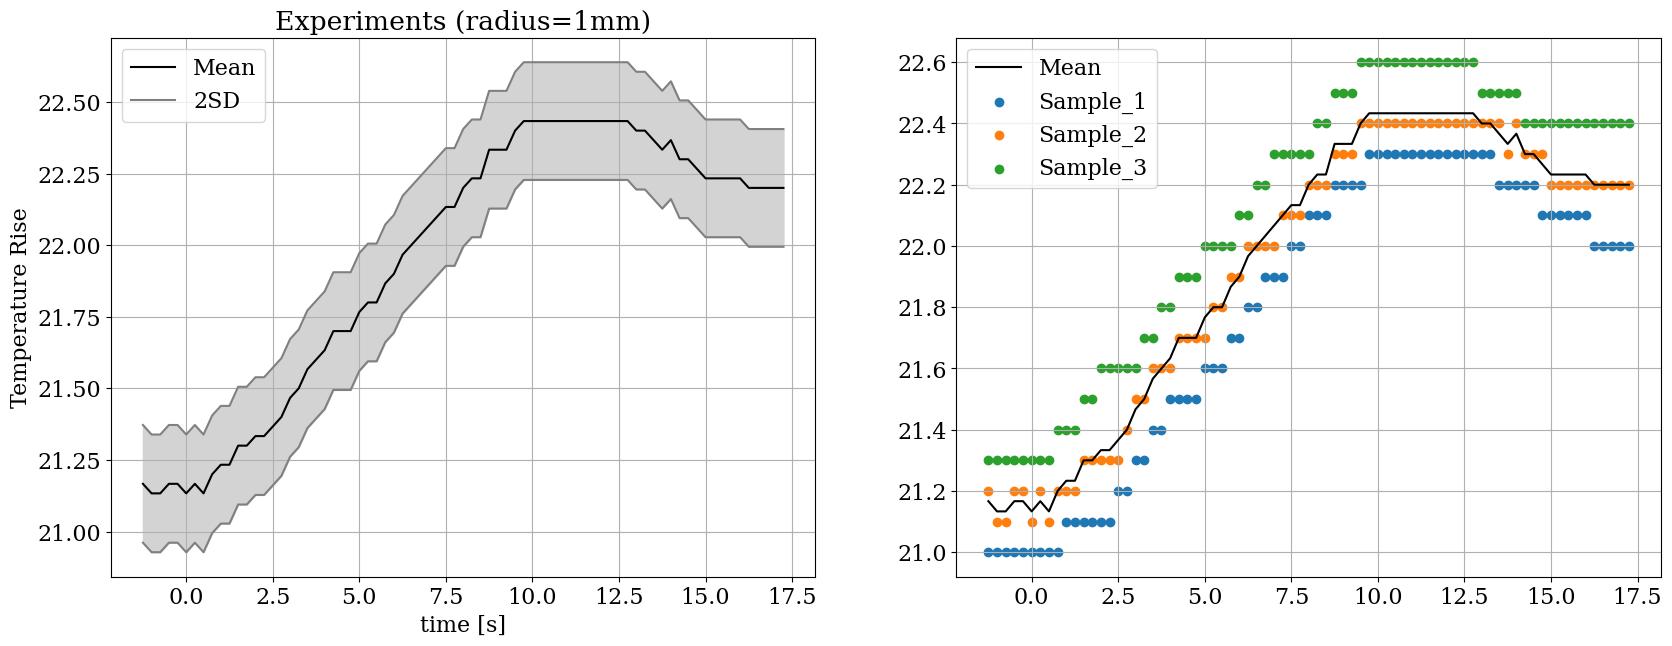

In [24]:
pyplot.figure(figsize=(20,7))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments (radius=1mm)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average1,linestyle='-',label="Mean",color="black")
pyplot.plot(data_time[75:150]-20, plus1,linestyle='-',label="2SD",color="gray")
pyplot.plot(data_time[75:150]-20, minus1,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus1, minus1, color="lightgray")
pyplot.legend()
pyplot.grid()
# pyplot.xlim(-0.1,15)
pyplot.subplot(1, 2, 2)
pyplot.plot(data_time[75:150]-20, average1,linestyle='-',label="Mean",color="black")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[2])[75:150],label="Sample_3")
pyplot.legend()
pyplot.grid()
# pyplot.xlim(-0.1,15)
pyplot.savefig('figures/experiments_radius1mm_1sd.png', dpi=300)

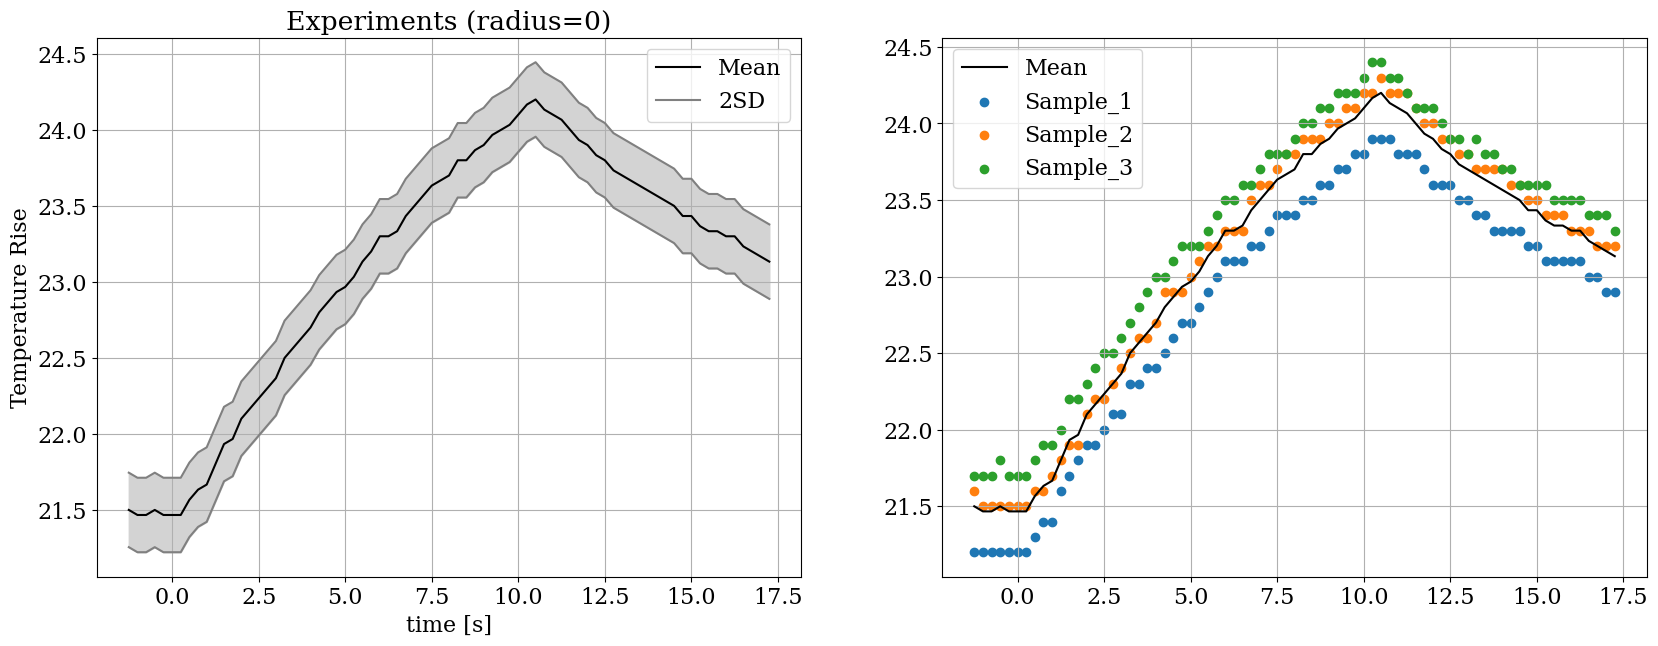

In [25]:
pyplot.figure(figsize=(20,7))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments (radius=0)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average0,linestyle='-',label="Mean",color="black")
pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',label="2SD",color="gray")
pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus0, minus0, color="lightgray")
# pyplot.xlim(-0.1,15)
# pyplot.ylim(-0.3,3.1)
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.plot(data_time[75:150]-20, average0,linestyle='-',label="Mean",color="black")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[2])[75:150],label="Sample_3")
pyplot.legend()
pyplot.grid()
# pyplot.xlim(-0.1,15)
# pyplot.ylim(-0.3,3.1)
pyplot.savefig('figures/experiments_radius0mm_1sd.png', dpi=300)

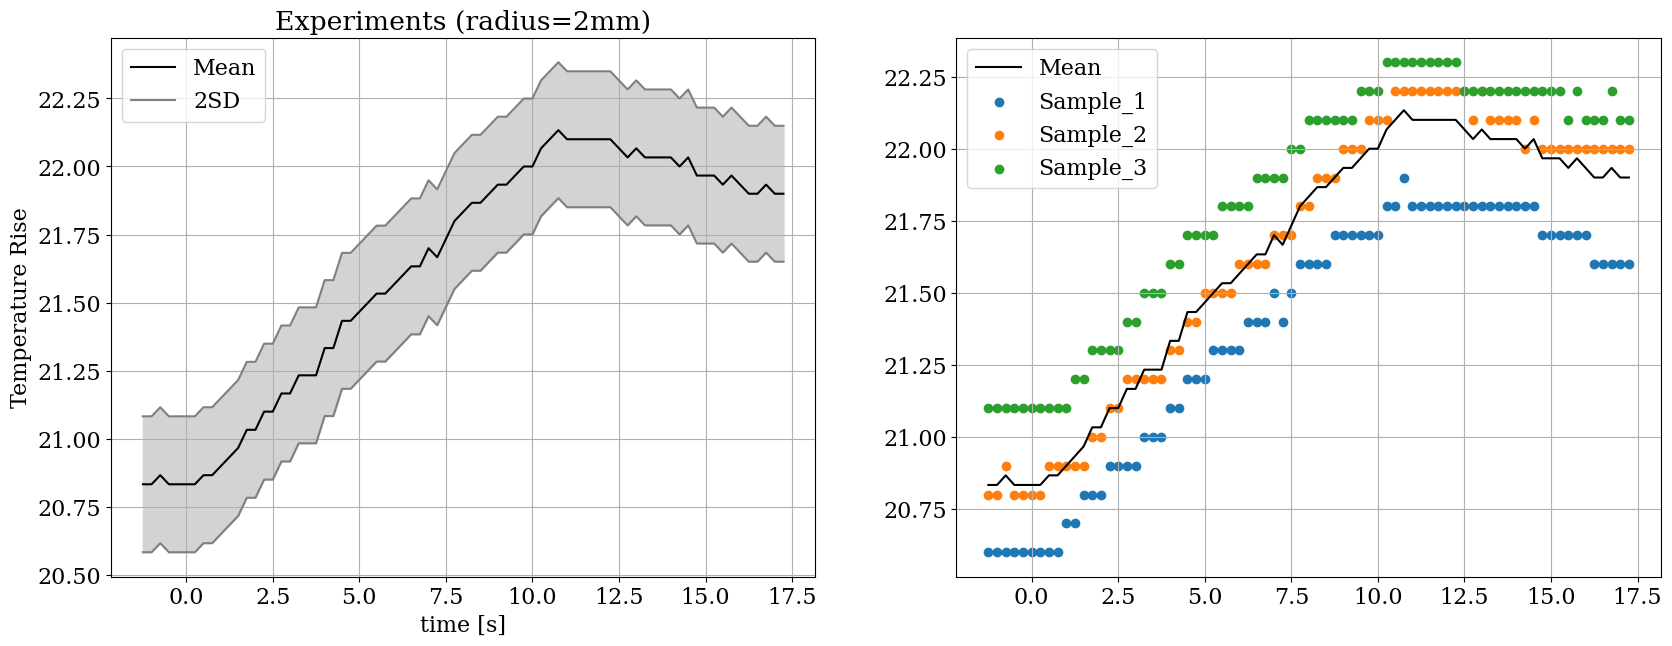

In [26]:
pyplot.figure(figsize=(20,7))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments (radius=2mm)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="Mean",color="black")
pyplot.plot(data_time[75:150]-20, plus2,linestyle='-',label="2SD",color="gray")
pyplot.plot(data_time[75:150]-20, minus2,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus2, minus2, color="lightgray")
pyplot.legend()
pyplot.grid()
# pyplot.xlim(-0.1,15)
# pyplot.ylim(-0.26,1.50)
pyplot.subplot(1,2,2)
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="Mean",color="black")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[2])[75:150],label="Sample_3")
pyplot.legend()
pyplot.grid()
# pyplot.xlim(-0.1,15)
# pyplot.ylim(-0.26,1.50)
pyplot.savefig('figures/experiments_radius2mm_1sd.png', dpi=300)

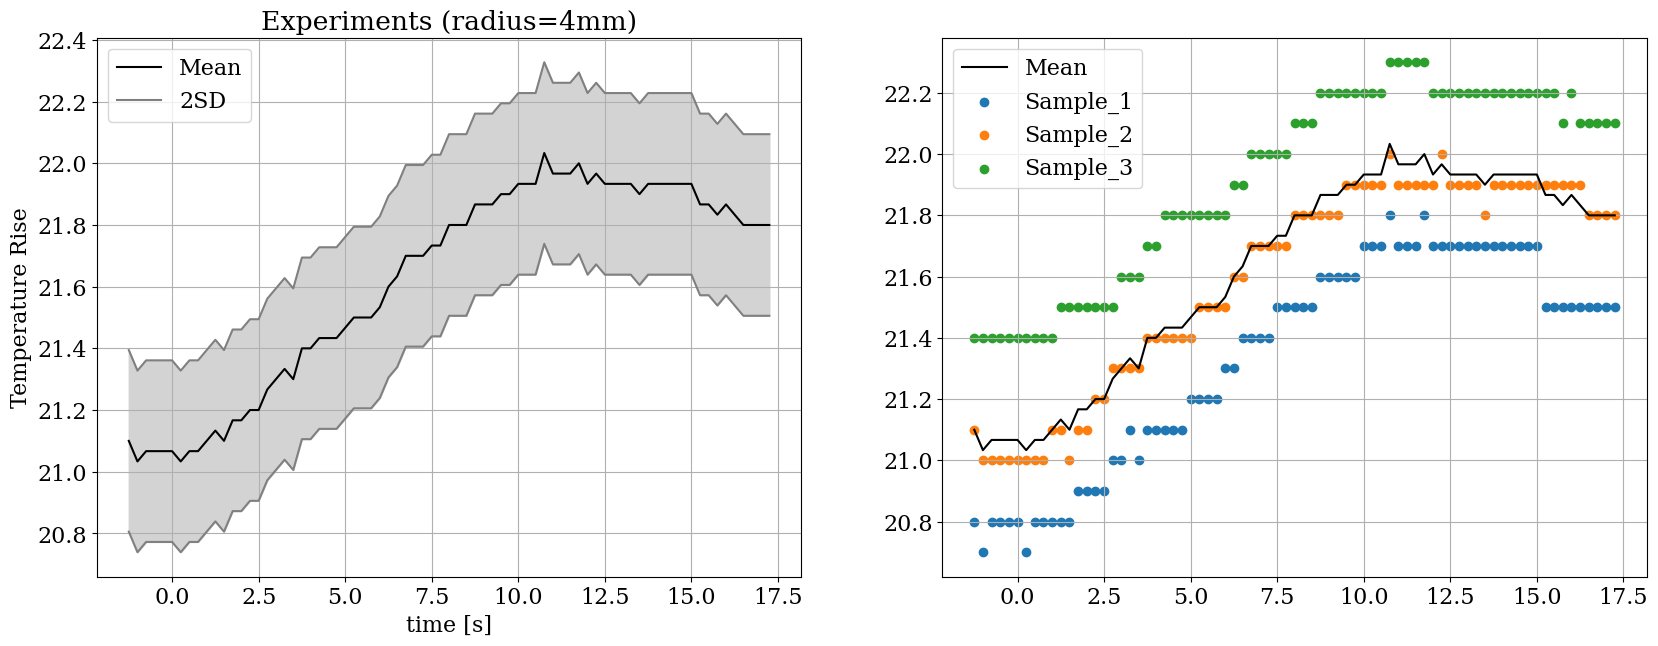

In [27]:
pyplot.figure(figsize=(20,7))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments (radius=4mm)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="Mean",color="black")
pyplot.plot(data_time[75:150]-20, plus4,linestyle='-',label="2SD",color="gray")
pyplot.plot(data_time[75:150]-20, minus4,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus4, minus4, color="lightgray")
# pyplot.xlim(-0.1,15)
# pyplot.ylim(-0.2,1.2)
pyplot.legend()
pyplot.grid()
pyplot.subplot(1,2,2)
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="Mean",color="black")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[2])[75:150],label="Sample_3")
pyplot.legend()
pyplot.grid()
# pyplot.xlim(-0.1,15)
# pyplot.ylim(-0.2,1.2)
pyplot.savefig('figures/experiments_radius4mm_1sd.png', dpi=300)

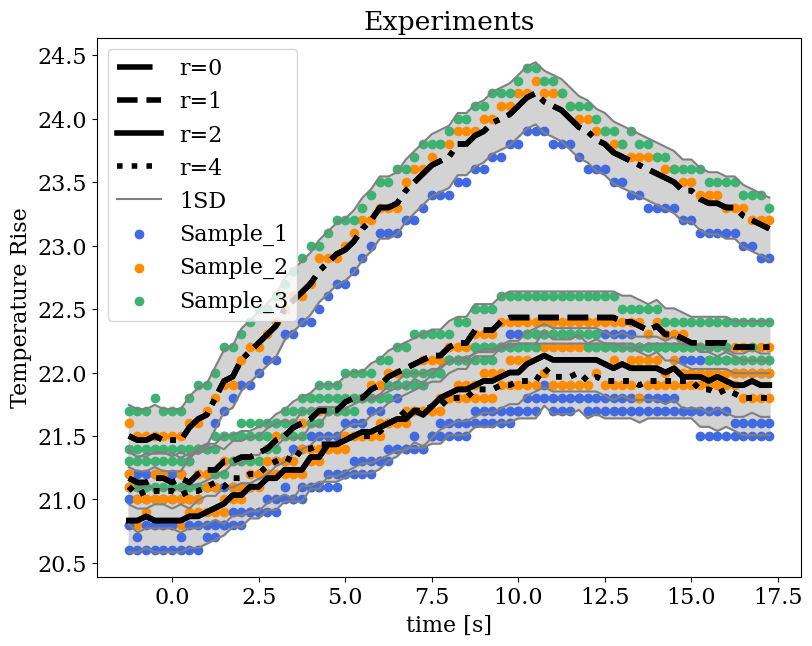

In [28]:
pyplot.figure(figsize=(20,7))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average0,linestyle='dashdot',label="r=0",color="black",linewidth=4)
pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',color="gray")
pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus0, minus0, color="lightgray")

pyplot.plot(data_time[75:150]-20, average1,linestyle='dashed',label="r=1",color="black",linewidth=4)
pyplot.plot(data_time[75:150]-20, plus1,linestyle='-',color="gray")
pyplot.plot(data_time[75:150]-20, minus1,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus1, minus1, color="lightgray")

pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="r=2",color="black",linewidth=4)
pyplot.plot(data_time[75:150]-20, plus2,linestyle='-',color="gray")
pyplot.plot(data_time[75:150]-20, minus2,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus2, minus2, color="lightgray")

pyplot.plot(data_time[75:150]-20, average4,linestyle='dotted',label="r=4",color="black",linewidth=4)
pyplot.plot(data_time[75:150]-20, plus4,linestyle='-',color="gray")
pyplot.plot(data_time[75:150]-20, minus4,linestyle='-',label="1SD",color="gray")
pyplot.fill_between(data_time[75:150]-20,plus4, minus4, color="lightgray")

pyplot.legend()
pyplot.grid()
# pyplot.xlim(-0.1,15)
# pyplot.subplot(1, 2, 2)

pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[0])[75:150],label="Sample_1", color='royalblue')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[1])[75:150],label="Sample_2", color='darkorange')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[2])[75:150],label="Sample_3", color='mediumseagreen')
pyplot.plot(data_time[75:150]-20, average0,linestyle='dashdot',color="black",linewidth=4)

pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[0])[75:150], color='royalblue')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[1])[75:150], color='darkorange')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[2])[75:150], color='mediumseagreen')
pyplot.plot(data_time[75:150]-20, average1,linestyle='dashed',color="black",linewidth=4)

pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[0])[75:150], color='royalblue')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[1])[75:150], color='darkorange')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[2])[75:150], color='mediumseagreen')
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',color="black",linewidth=4)

pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[0])[75:150], color='royalblue')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[1])[75:150], color='darkorange')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[2])[75:150], color='mediumseagreen')
pyplot.plot(data_time[75:150]-20, average4,linestyle='dotted',color="black",linewidth=4)

pyplot.legend()
pyplot.grid()
# pyplot.xlim(-0.1,15)
pyplot.savefig('figures/experiments_radiusALL_1sd.png', dpi=300)

# Simulation 
HAFM Full Geometry 

### Applied Power Profiles
doesn't currently reflect the UQ study!!!

In [29]:
dataPowerS1 = pd.read_csv("power_data/samples_LHS/sample1.csv")
dataPowerS1['t[s]'];
dataPowerS1['Power[W m^-3]'];
dataPowerS2 = pd.read_csv('power_data/samples_LHS/sample2.csv')
dataPowerS3 = pd.read_csv('power_data/samples_LHS/sample3.csv')
dataPowerS4 = pd.read_csv('power_data/samples_LHS/sample4.csv')
dataPowerS5 = pd.read_csv('power_data/samples_LHS/sample5.csv')
dataPowerS6 = pd.read_csv('power_data/samples_LHS/sample6.csv')
dataPowerS7 = pd.read_csv('power_data/samples_LHS/sample7.csv')
dataPowerS8 = pd.read_csv('power_data/samples_LHS/sample8.csv')
dataPowerS9 = pd.read_csv('power_data/samples_LHS/sample9.csv')
dataPowerS10 = pd.read_csv('power_data/samples_LHS/sample10.csv')

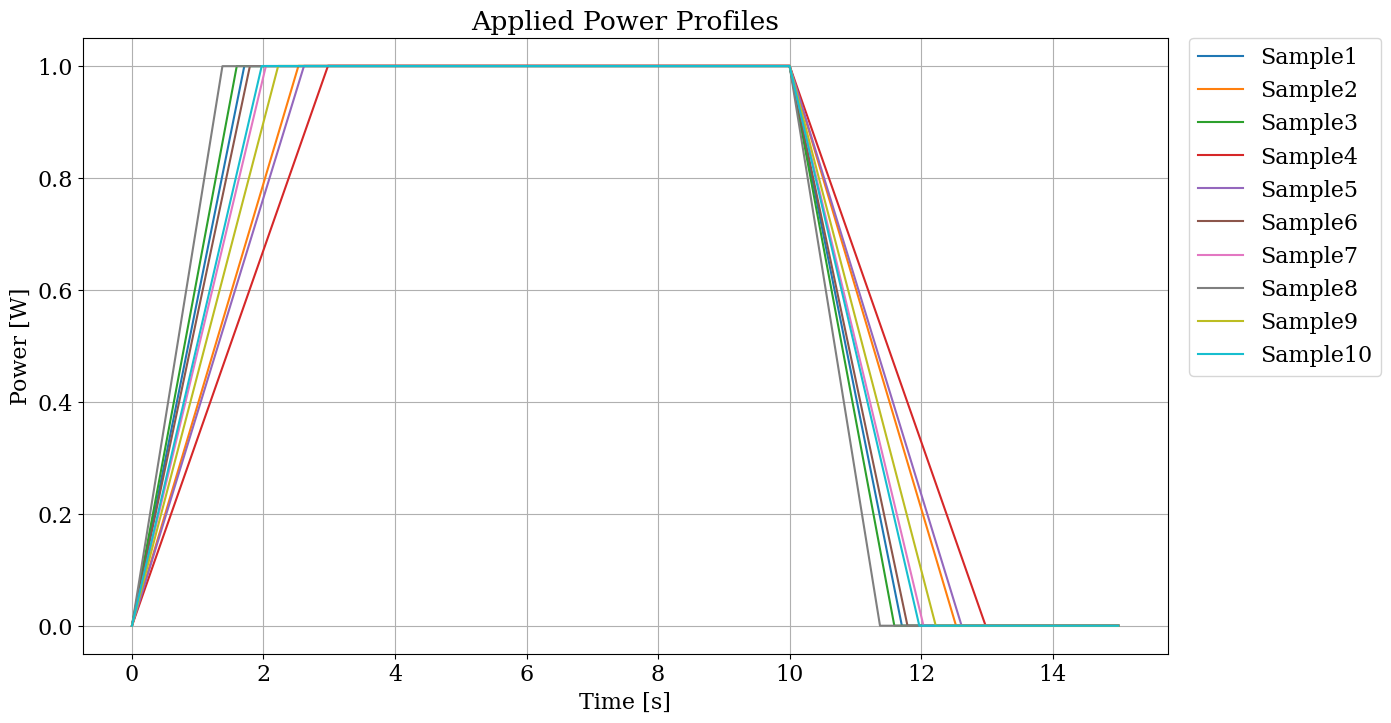

In [30]:
pyplot.figure(figsize=(14,8))
pyplot.title('Applied Power Profiles')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Power [W]')
pyplot.plot(dataPowerS1['t[s]'], dataPowerS1['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample1') 
pyplot.plot(dataPowerS2['t[s]'], dataPowerS2['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample2') 
pyplot.plot(dataPowerS3['t[s]'], dataPowerS3['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample3') 
pyplot.plot(dataPowerS4['t[s]'], dataPowerS4['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample4') 
pyplot.plot(dataPowerS5['t[s]'], dataPowerS5['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample5')
pyplot.plot(dataPowerS6['t[s]'], dataPowerS6['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample6') 
pyplot.plot(dataPowerS7['t[s]'], dataPowerS7['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample7') 
pyplot.plot(dataPowerS8['t[s]'], dataPowerS8['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample8') 
pyplot.plot(dataPowerS9['t[s]'], dataPowerS9['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample9') 
pyplot.plot(dataPowerS10['t[s]'], dataPowerS10['Power[W m^-3]']/((1/13.1533)*(1e9)),label='Sample10') 
pyplot.grid()
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
pyplot.savefig('figures/samples10_appliedpower_duration.png', dpi=300)

# Preliminary UQ study/Sensitivity Analysis

In [34]:
dataExp = pd.read_csv("data_exp/Temp_Diff_Data/exp_1W_0.5LPM.csv")
# dataExp = pd.read_csv("data_exp/Raw_Temp_Data/Air Temperature Measurments_1W_0.5LPM.csv")
dataSimS1   = pd.read_csv("data_sim/uq_prop/outputsample1.csv")
dataSimS2   = pd.read_csv("data_sim/uq_prop/outputsample2.csv")

In [53]:
s1time = dataSimS1['Time [s]']
s1TptInlet = dataSimS1['Monitor Point: Inlet (Temperature) [K]']-298.152039
s1Tptneg05 = dataSimS1['Monitor Point: MouthpieceAbove1mmneg05Temp (Temperature) [K]']-298.152039
s1Tpt0 = dataSimS1['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-298.152039
s1Tpt0X05 = dataSimS1['Monitor Point: MouthpieceAbove1mm0mmX05mmT (Temperature) [K]']-298.152039
s1Tpt05 = dataSimS1['Monitor Point: MouthpieceAbove1mm05mmTemp (Temperature) [K]']-298.152039
s1Tpt1TRILINEAR = dataSimS1['Monitor Point: MouthpieceAbove1mm1mmTRILINEARTemp (Temperature) [K]']-298.152039
s1Tpt1 = dataSimS1['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-298.152039
s1Tpt1X05 = dataSimS1['Monitor Point: MouthpieceAbove1mm1mmX05mmT (Temperature) [K]']-298.152039
s1Tpt15 = dataSimS1['Monitor Point: MouthpieceAbove1mm15mmTemp (Temperature) [K]']-298.152039
s1Tpt2TRILINEAR = dataSimS1['Monitor Point: MouthpieceAbove1mm2mmTRILINEARTemp (Temperature) [K]']-298.152039
s1Tpt2 = dataSimS1['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-298.152039
s1Tpt2X05 = dataSimS1['Monitor Point: MouthpieceAbove1mm2mmX05mmT (Temperature) [K]']-298.152039
s1Tpt25 = dataSimS1['Monitor Point: MouthpieceAbove1mm25mmTemp (Temperature) [K]']-298.152039
s1Tpt3 = dataSimS1['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-298.152039
s1Tpt3X05 = dataSimS1['Monitor Point: MouthpieceAbove1mm3mmX05mmT (Temperature) [K]']-298.152039
s1Tpt35 = dataSimS1['Monitor Point: MouthpieceAbove1mm35mmTemp (Temperature) [K]']-298.152039
s1Tpt4 = dataSimS1['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-298.152039
s1Tpt4X05 = dataSimS1['Monitor Point: MouthpieceAbove1mm4mmX05mmT (Temperature) [K]']-298.152039
# Tpt45 = dataSimS1['Monitor Point: MouthpieceAbove1mm45mmTemp (Absolute Pressure) [Pa]']
s1Tpt5 = dataSimS1['Monitor Point: MouthpieceAbove1mm5mmTemp (Temperature) [K]']-298.152039

s2time = dataSimS2['Time [s]']
s2TptInlet = dataSimS2['Monitor Point: Inlet (Temperature) [K]']-298.152039
s2Tptneg05 = dataSimS2['Monitor Point: MouthpieceAbove1mmneg05Temp (Temperature) [K]']-298.152039
s2Tpt0 = dataSimS2['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-298.152039
s2Tpt0X05 = dataSimS2['Monitor Point: MouthpieceAbove1mm0mmX05mmT (Temperature) [K]']-298.152039
s2Tpt05 = dataSimS2['Monitor Point: MouthpieceAbove1mm05mmTemp (Temperature) [K]']-298.152039
s2Tpt1TRILINEAR = dataSimS2['Monitor Point: MouthpieceAbove1mm1mmTRILINEARTemp (Temperature) [K]']-298.152039
s2Tpt1 = dataSimS1['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-298.152039
s2Tpt1X05 = dataSimS2['Monitor Point: MouthpieceAbove1mm1mmX05mmT (Temperature) [K]']-298.152039
s2Tpt15 = dataSimS2['Monitor Point: MouthpieceAbove1mm15mmTemp (Temperature) [K]']-298.152039
s2Tpt2TRILINEAR = dataSimS2['Monitor Point: MouthpieceAbove1mm2mmTRILINEARTemp (Temperature) [K]']-298.152039
s2Tpt2 = dataSimS2['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-298.152039
s2Tpt2X05 = dataSimS2['Monitor Point: MouthpieceAbove1mm2mmX05mmT (Temperature) [K]']-298.152039
s2Tpt25 = dataSimS2['Monitor Point: MouthpieceAbove1mm25mmTemp (Temperature) [K]']-298.152039
s2Tpt3 = dataSimS2['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-298.152039
s2Tpt3X05 = dataSimS2['Monitor Point: MouthpieceAbove1mm3mmX05mmT (Temperature) [K]']-298.152039
s2Tpt35 = dataSimS2['Monitor Point: MouthpieceAbove1mm35mmTemp (Temperature) [K]']-298.152039
s2Tpt4 = dataSimS2['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-298.152039
s2Tpt4X05 = dataSimS2['Monitor Point: MouthpieceAbove1mm4mmX05mmT (Temperature) [K]']-298.152039
# Tpt45 = dataSimS1['Monitor Point: MouthpieceAbove1mm45mmTemp (Absolute Pressure) [Pa]']
s2Tpt5 = dataSimS2['Monitor Point: MouthpieceAbove1mm5mmTemp (Temperature) [K]']-298.152039

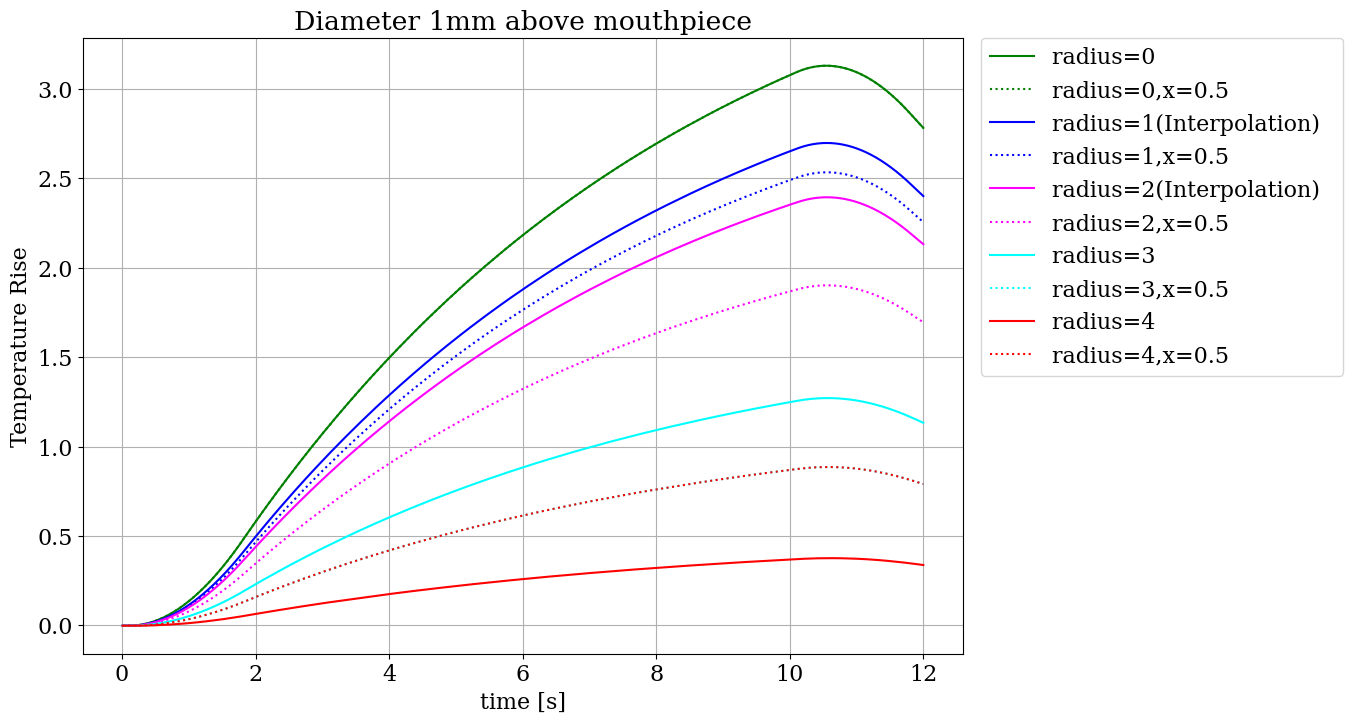

In [36]:
pyplot.figure(figsize=(25,8))
pyplot.subplot(1, 2, 1)
pyplot.title('Diameter 1mm above mouthpiece') # \n Velocity=0.5147[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# pyplot.plot(data_time[75:150]-19.5, average0,linestyle='-',label="ExpAverage_Center",color="black",linewidth=4)
# # # pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',color="gray",label="+2SD",)
# # # pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',color="gray",label="-2SD",)
# pyplot.fill_between(data_time[75:150]-19.5,plus0, minus0, color="lightgray")
# pyplot.plot(data_time[75:150]-19.5, average1,linestyle='-',label="ExpAverage_1mm",color="green",linewidth=4)
# pyplot.fill_between(data_time[75:150]-19.5,plus1, minus1, color="lightgray")
# pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="ExpAverage_2mm",color="blue",linewidth=4)
# pyplot.fill_between(data_time[75:150]-19.5,plus2, minus2, color="lightgray")
# pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage_4mm",color="darkgray",linewidth=4)
# pyplot.fill_between(data_time[75:150]-19.5,plus4, minus4, color="lightgray")

# pyplot.plot(s1time, s1TptInlet       , label='s1TptInlet       ') #,color="red",linewidth=4    
# pyplot.plot(s1time, s1Tptneg05       , label='radius=-0.5      ') #,color="red",linewidth=4    
pyplot.plot(s1time, s1Tpt0           , label='radius=0         ',color="green") #,color="red",linewidth=4 
pyplot.plot(s1time, s1Tpt0X05        , label='radius=0,x=0.5   ',linestyle="dotted",color="green") #,color="red",linewidth=4   
# pyplot.plot(s1time, s1Tpt05          , label='radius=0.5          ') #,color="red",linewidth=4 
pyplot.plot(s1time, s1Tpt1TRILINEAR  , label='radius=1(Interpolation)  ',color='blue') #,color="red",linewidth=4         
# pyplot.plot(s1time, s1Tpt1           , label='radius=1           ') #,color="red",linewidth=4
pyplot.plot(s1time, s1Tpt1X05        , label='radius=1,x=0.5        ',linestyle="dotted",color='blue') #,color="red",linewidth=4   
# pyplot.plot(s1time, s1Tpt15          , label='radius=1.5          ') #,color="red",linewidth=4 
pyplot.plot(s1time, s1Tpt2TRILINEAR  , label='radius=2(Interpolation)  ',color="magenta") #,color="red",linewidth=4         
# pyplot.plot(s1time, s1Tpt2           , label='radius=2           ') #,color="red",linewidth=4
pyplot.plot(s1time, s1Tpt2X05        , label='radius=2,x=0.5        ',linestyle="dotted",color="magenta") #,color="red",linewidth=4   
# pyplot.plot(s1time, s1Tpt25          , label='radius=2.5          ') #,color="red",linewidth=4 
pyplot.plot(s1time, s1Tpt3           , label='radius=3           ',color="cyan") #,color="red",linewidth=4
pyplot.plot(s1time, s1Tpt3X05        , label='radius=3,x=0.5        ',linestyle="dotted",color="cyan" ) #,color="red",linewidth=4   
# pyplot.plot(s1time, s1Tpt35          , label='radius=3.5          ') #,color="red",linewidth=4 
pyplot.plot(s1time, s1Tpt4           , label='radius=4           ',color='red') #,color="red",linewidth=4
pyplot.plot(s1time, s1Tpt4X05        , label='radius=4,x=0.5        ',linestyle="dotted",color='red') #,color="red",linewidth=4   
# pyplot.plot(s1time, s1Tpt5           , label='radius=5           ') #,color="red",linewidth=4

# pyplot.xlim([-0.5,18])
# pyplot.ylim([-0.1, 3.5])
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
pyplot.grid()

# HAFM - Final Sample Analysis

In [37]:
dataSample1 = pd.read_csv("Samples/output/New_Samples/outputSample1.csv",skiprows = 4)
dataSample2 = pd.read_csv("Samples/output/New_Samples/outputSample2.csv",skiprows = 4)
dataSample3 = pd.read_csv("Samples/output/New_Samples/outputSample3.csv",skiprows = 4)
dataSample4 = pd.read_csv("Samples/output/New_Samples/outputSample4.csv",skiprows = 4)
dataSample5 = pd.read_csv("Samples/output/New_Samples/outputSample5.csv",skiprows = 4)
dataSample6 = pd.read_csv("Samples/output/New_Samples/outputSample6.csv",skiprows = 4)
dataSample7 = pd.read_csv("Samples/output/New_Samples/outputSample7.csv",skiprows = 4)
dataSample8 = pd.read_csv("Samples/output/New_Samples/outputSample8.csv",skiprows = 4)
dataSample9 = pd.read_csv("Samples/output/New_Samples/outputSample9.csv",skiprows = 4)
dataSample10 = pd.read_csv("Samples/output/New_Samples/outputSample10.csv",skiprows = 4)

In [38]:
headerLabels = dataSample1.columns
timesteps = [0.100000001,1.0,2.0,4.0,5.0,10.0,11.0,12.0]
times = pd.DataFrame([dataSample1[headerLabels[0]],dataSample2[headerLabels[0]],dataSample3[headerLabels[0]],dataSample4[headerLabels[0]],dataSample5[headerLabels[0]],dataSample6[headerLabels[0]],dataSample7[headerLabels[0]],dataSample8[headerLabels[0]],dataSample9[headerLabels[0]],dataSample10[headerLabels[0]]])                                                                         
timez = times.transpose()
my_list = [dataSample1[headerLabels[0]]]
my_list = list(my_list[0][0:])
# timesId = my_list.index(0.25)
timesId = [my_list.index(timesteps[0]),my_list.index(timesteps[1]),my_list.index(timesteps[2]),
           my_list.index(timesteps[3]),my_list.index(timesteps[4]),my_list.index(timesteps[5]),
           my_list.index(timesteps[6]),my_list.index(timesteps[7])]

### At the 1mm above the mouthpiece

In [39]:
i = 1
dataSample1Max,dataSample2Max,dataSample3Max,dataSample4Max,dataSample5Max = [],[],[],[],[]
dataSample6Max,dataSample7Max,dataSample8Max,dataSample9Max,dataSample10Max = [],[],[],[],[]
while i < len(headerLabels):
    dataSample1Max.append( np.max(dataSample1[headerLabels[i]]))
    dataSample2Max.append( np.max(dataSample2 [headerLabels[i]]))
    dataSample3Max.append( np.max(dataSample3 [headerLabels[i]]))
    dataSample4Max.append( np.max(dataSample4 [headerLabels[i]]))
    dataSample5Max.append( np.max(dataSample5 [headerLabels[i]]))
    dataSample6Max.append( np.max(dataSample6 [headerLabels[i]]))
    dataSample7Max.append( np.max(dataSample7 [headerLabels[i]]))
    dataSample8Max.append( np.max(dataSample8 [headerLabels[i]]))
    dataSample9Max.append( np.max(dataSample9 [headerLabels[i]]))
    dataSample10Max.append(np.max(dataSample10[headerLabels[i]]))
    i+=1;

In [40]:
dataMax =[dataSample1Max,dataSample2Max,dataSample3Max,dataSample4Max,dataSample5Max,
         dataSample6Max,dataSample7Max,dataSample8Max,dataSample9Max,dataSample10Max]
dfMax = pd.DataFrame(dataMax)
dfMax.columns = headerLabels[1:]
dfMax

Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]  \
0                                         301.148895           
1                                         301.125824           
2                                         301.257263           
3                                         301.199371           
4                                         301.075439           
5                                         301.141602           
6                                         301.238220           
7                                         301.284149           
8                                         301.164307           
9                                         301.106354           

   Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]  \
0                                         301.158722               
1                                         301.135590               
2                                         301.267487               
3                                         301.209412               
4                                         301.085022               
5                                         301.151398               
6                                         301.248352               
7                                         301.294434               
8                                         301.174194               
9                                         301.116058               

   Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]  \
0                                         301.112183             
1                                         301.089447             
2                                         301.219482             
3                                         301.162354             
4                                         301.039581             
5                                         301.104950             
6                                         301.200653             
7                                         301.246063             
8                                         301.127533             
9                                         301.070099             

   Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]  \
0                                         301.165649              
1                                         301.142365              
2                                         301.274200              
3                                         301.215912              
4                                         301.091888              
5                                         301.158325              
6                                         301.255005              
7                                         301.301178              
8                                         301.180969              
9                                         301.122986              

   Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]  \
0                                         301.132141            
1                                         301.109283            
2                                         301.240326            
3                                         301.182861            
4                                         301.059021            
5                                         301.124878            
6                                         301.221405            
7                                         301.267120            
8                                         301.147644            
9                                         301.089722            

   Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]  \
0                                         300.964386           
1                                         300.943054           
2                                         301.067474           
3                                         301.013428           
4                                         300.89

In [41]:
s , uq = 1, []
while s < len(headerLabels):
    x = str(np.mean(dfMax[headerLabels[s]]))
    y = str(np.std(dfMax[headerLabels[s]]))
    uq.append(x + '+/- '+ y)
    s+=1;

In [42]:
dfMaxUQ = pd.DataFrame(uq)
dfMaxUQz = dfMaxUQ.transpose()
dfMaxUQz.columns = headerLabels[1:]
dfMaxUQz

Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]  \
0                 301.1741424+/- 0.06497557027406756          

  Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]  \
0                 301.1840669+/- 0.06519736627266057              

  Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]  \
0                 301.1372345+/- 0.06430567732673176            

  Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]  \
0                 301.1908477+/- 0.06511824110961607             

  Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]  \
0          301.15744010000003+/- 0.06482665227890216           

  Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]  \
0          300.98871779999996+/- 0.06167291868040537          

  Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]  \
0          301.02649239999994+/- 0.06231601776141456              

  Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]  \
0                 300.9367583+/- 0.06095556970129773            

  Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]  \
0          300.98354489999997+/- 0.06159141280154148             

  Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]  ...  \
0                 300.9701082+/- 0.06156436506422057          ...   

  Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]  \
0                 299.8562621+/- 0.04087791119284294            

  Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]  \
0                 300.0414978+/- 0.04476424325016223                

  Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]  \
0          299.69779639999996+/- 0.03719078712853091              

  Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]  \
0                  299.8590484+/- 0.0407546163034316             

  Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]  \
0                 299.8514894+/- 0.04082086090518215             

  Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]  \
0                 299.028772+/- 0.020523656594273562           

  Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]  \
0          299.21906749999994+/- 0.02559517853131566               

  Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]  \
0         298.83848270000004+/- 0.015465080924778952             

  Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]  \
0                299.0281524+/- 0.020524210884708304            

  Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]  
0                 298.9799224+/- 0.01919609490077879           

[1 rows x 75 columns]

In [43]:
m,erravgplus0,erravgminus0 = 0,[],[] 
while m < len(average0):
    erravgplus0.append(average0[m]+1.8)
    erravgminus0.append(average0[m]-1.8)
    m+=1

# Point 0

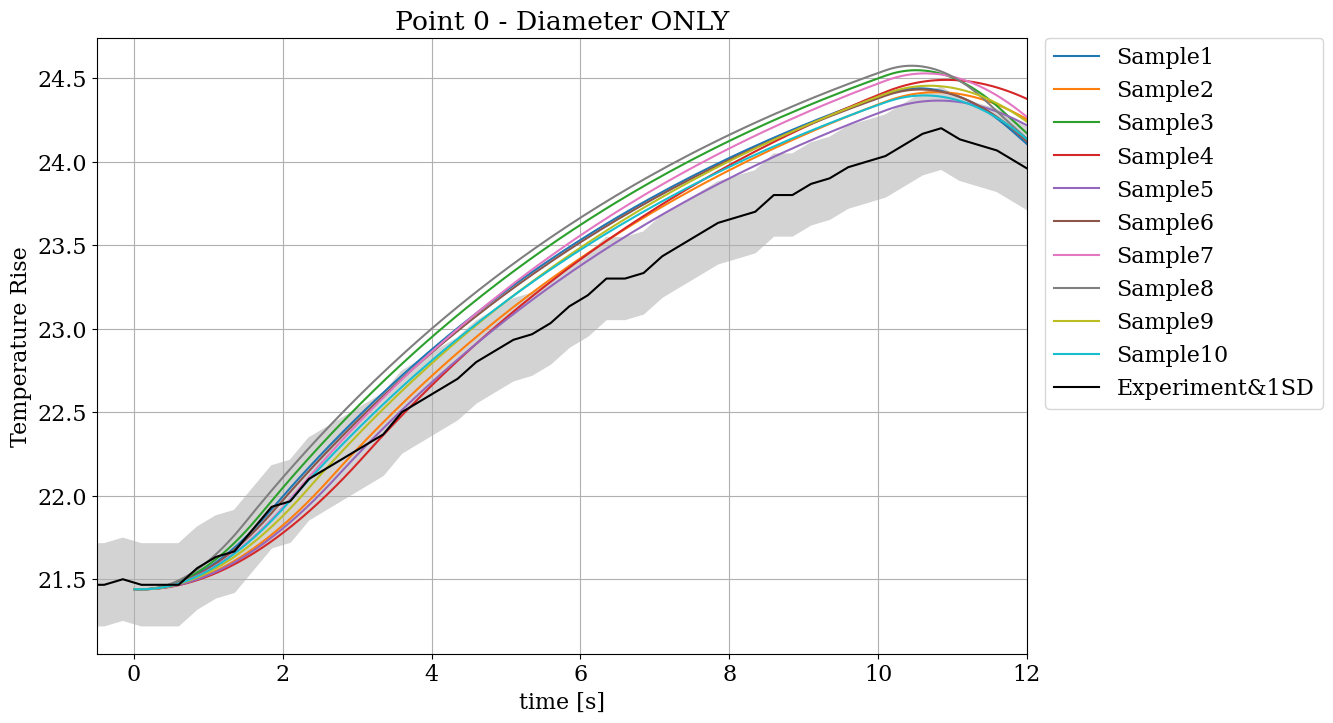

In [55]:
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
convert = 276.71 #273.15 #temp diff use -298.152039 
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample1') 
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample2') 
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample3') 
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample4') 
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample6') 
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample7') 
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample8') 
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample9') 
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert,label='Sample10') 

pyplot.plot(data_time[75:150]-19.650, average0,linestyle='-',label="Experiment&1SD",color="black")
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.650,plus0, minus0, color="lightgray")

pyplot.grid()
pyplot.xlim([-0.5,12])
pyplot.title('Point 0 - Diameter ONLY');
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
# pyplot.ylim([-1,1.2])
pyplot.savefig('figures/sim_point0_diameterONLY_1sd.png', dpi=300)

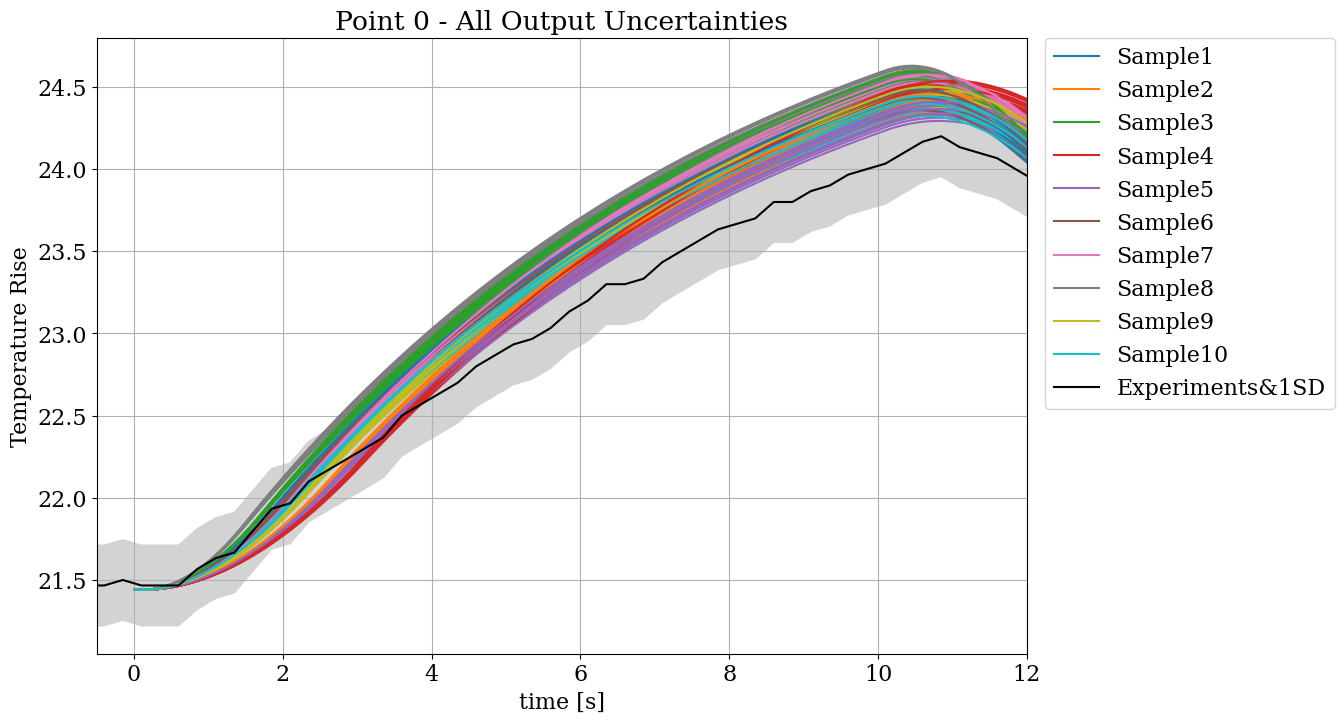

In [57]:
#### All Uncertainties
pyplot.figure(figsize=(12,8))
# Z 1mm above mouthpiece
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample1')
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample2')
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample3')
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample4')
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample6')
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample7')
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample8')
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample9')
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]']-convert, label='Sample10')

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]']-convert)

##### Z up
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]']-convert)

## Z down
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]']-convert)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]']-convert)

pyplot.plot(data_time[75:150]-19.65, average0,linestyle='-',label="Experiments&1SD",color="black")
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.65,plus0, minus0, color="lightgray")

pyplot.grid()
pyplot.xlim([-0.5,12])
# pyplot.ylim([-0.25,5])
pyplot.title('Point 0 - All Output Uncertainties');
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point0_outputUncert_1sd_samples.png', dpi=300)

In [58]:
i = 0
samplemeanP0, samplestdP0 = [],[]
while i < len(dataSample1['Time [s]']):
    samplesall = [
        dataSample1['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: Mouthpiece1mm0mmTempXdownYZ (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: Mouthpiece1mm0mmTempXupYZ (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YupZ (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YdownZ (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceUp0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceUp0mmTempzXupYZup (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceUp0mmTempzX0YZup (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceUp0mmTempzX0YupZup (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceUp0mmTempzX0YdownZup (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceDown0mmTempzXdownYZ (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceDown0mmTempzXupYZdown (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceDown0mmTempzX0YZdown (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceDown0mmTempzX0YupZdown (Temperature) [K]'][i]-convert,
        dataSample1['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample2['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample3['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample4['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample5['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample6['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample7['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample8['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample9['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert,
        dataSample10['Monitor Point: MouthpieceDown0mmTempzX0YdownZdown (Temperature) [K]'][i]-convert
                 
                 ]
    
    samplemeanP0.append(np.mean(samplesall))
    samplestdP0.append(np.std(samplesall))
    i +=1

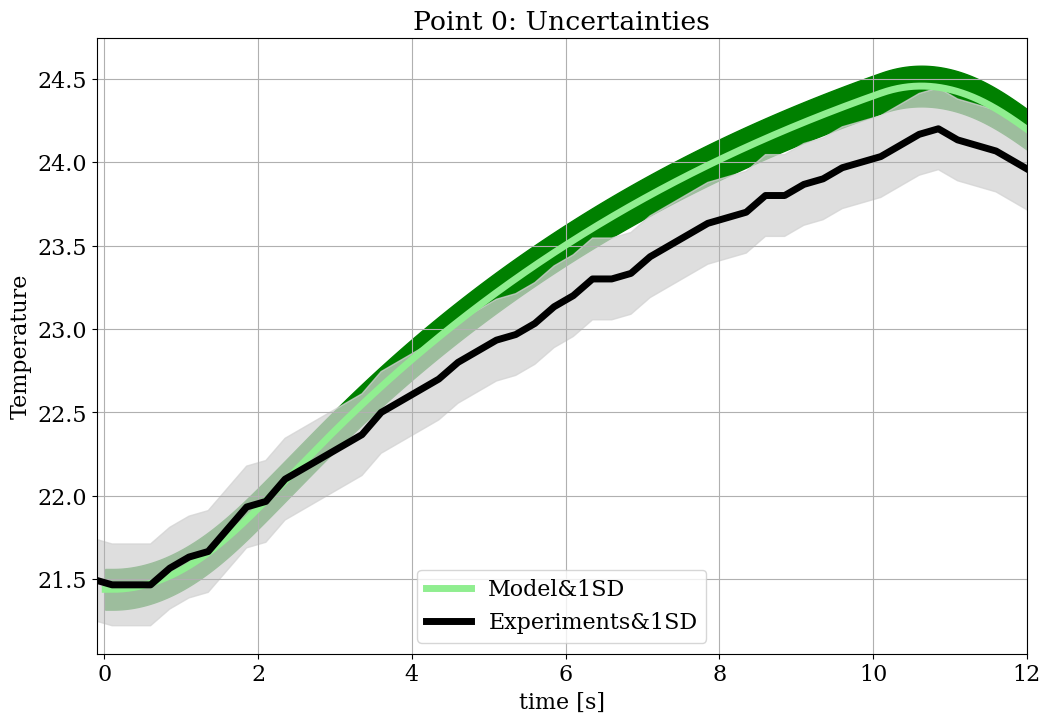

In [63]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.title('Point 0: Uncertainties')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature')
pyplot.plot(dataSample1['Time [s]'],samplemeanP0, label='Model&1SD', color='lightgreen',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP0+1*np.max(samplestdP0),samplemeanP0-1*np.max(samplestdP0), color='green')
pyplot.plot(data_time[75:150]-19.65, average0,linestyle='-',label="Experiments&1SD",color="black",linewidth='5')
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.65,plus0, minus0, color="lightgray",alpha=0.75)
pyplot.grid()
pyplot.legend(loc='lower center');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point0_outputUncert_1sd_avg.png', dpi=300)

# Point 1

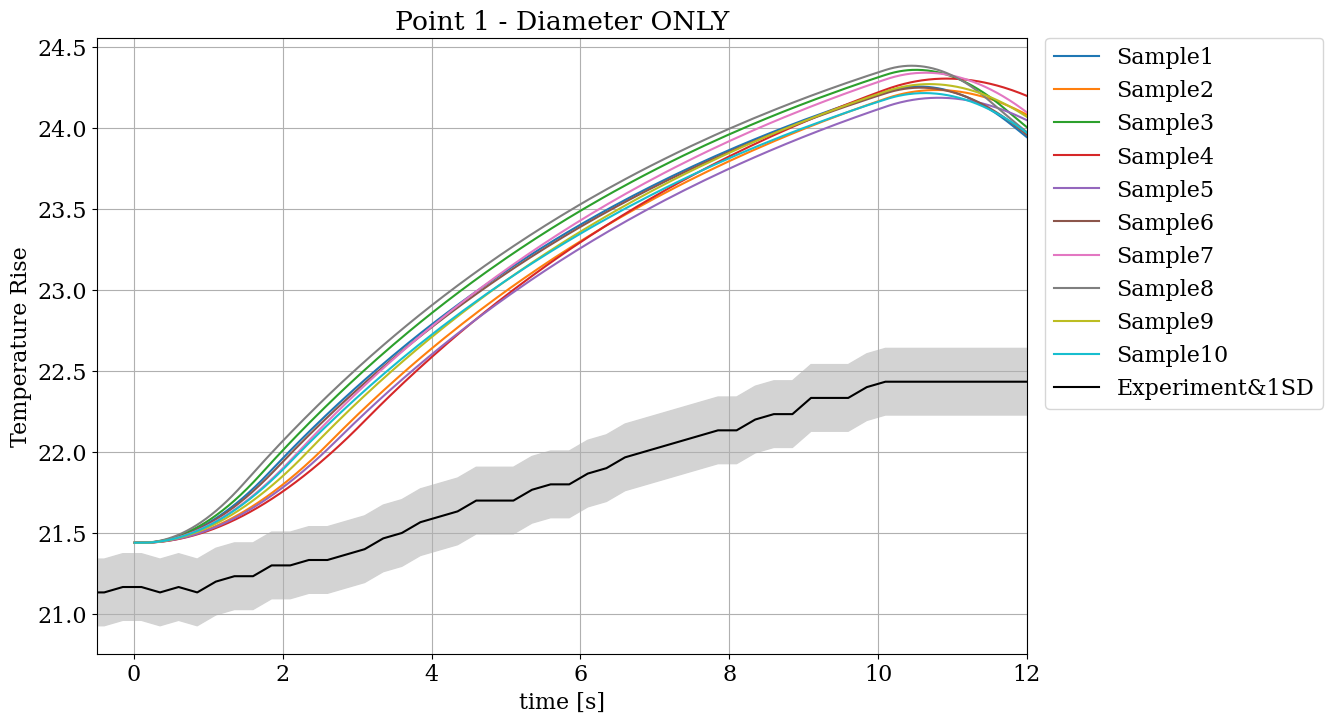

In [61]:
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# Diameter radius 1mm
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample1') 
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample2') 
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample3') 
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample4') 
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample6') 
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample7') 
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample8') 
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample9') 
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-convert,label='Sample10') 

pyplot.plot(data_time[75:150]-19.650, average1,linestyle='-',label="Experiment&1SD",color="black")
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.650,plus1, minus1, color="lightgray")

pyplot.grid()
pyplot.xlim([-0.5,12]);
pyplot.title('Point 1 - Diameter ONLY');
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point1_diameterONLY_1sd.png', dpi=300)

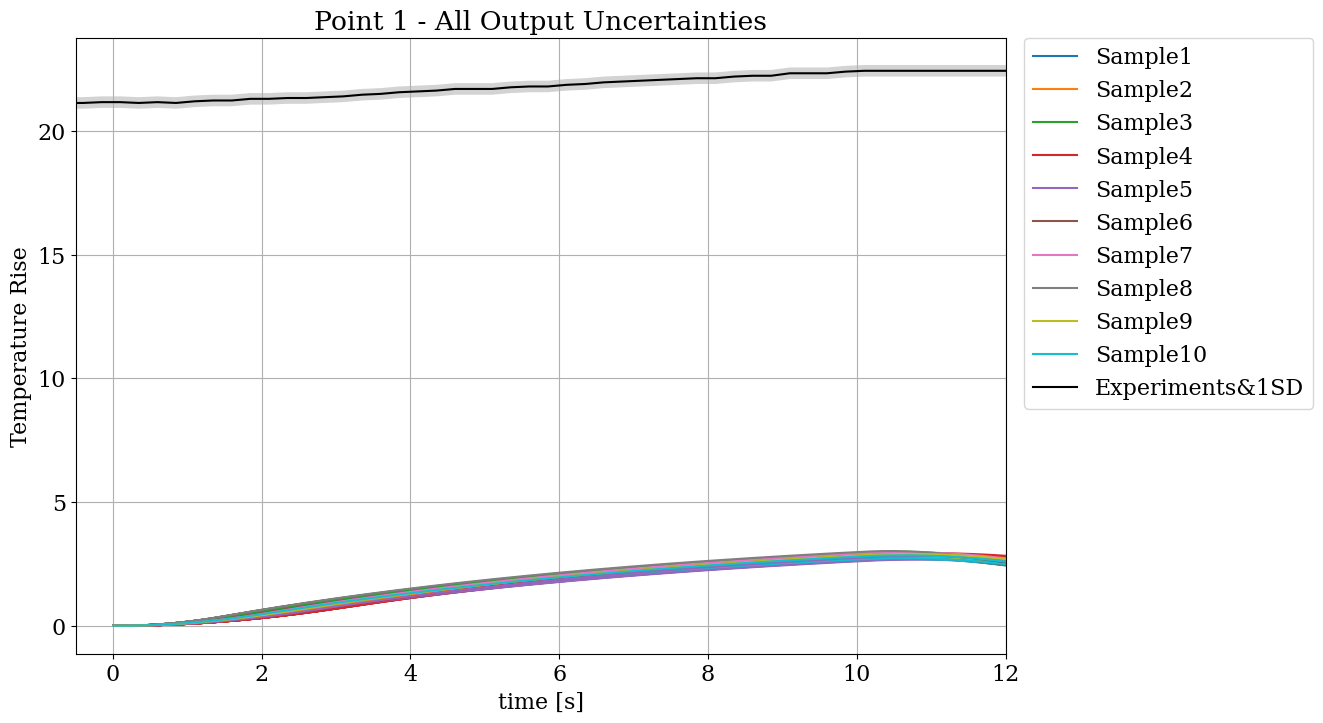

In [62]:
#### All Uncertainties
pyplot.figure(figsize=(12,8))
# Z 1mm above mouthpiece
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample1')
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample2')
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample3')
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample4')
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample6')
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample7')
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample8')
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample9')
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample10')

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]']-298.152039)

##### Z up
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]']-298.152039)

## Z down
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]']-298.152039)

pyplot.plot(data_time[75:150]-19.65, average1,linestyle='-',label="Experiments&1SD",color="black")
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.65,plus1, minus1, color="lightgray")

pyplot.grid()
pyplot.xlim([-0.5,12])
# pyplot.ylim([-0.25,5])
pyplot.title('Point 1 - All Output Uncertainties');
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point1_outputUncert_1sd_samples.png', dpi=300)


In [30]:
i = 0
samplemeanP1, samplestdP1 = [],[]
while i < len(dataSample1['Time [s]']):
    samplesall = [
        dataSample1['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm1mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm1mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp1mmTempzXdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp1mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp1mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp1mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp1mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown1mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown1mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown1mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown1mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown1mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
    ]
    samplemeanP1.append(np.mean(samplesall))
    samplestdP1.append(np.std(samplesall))
    i +=1

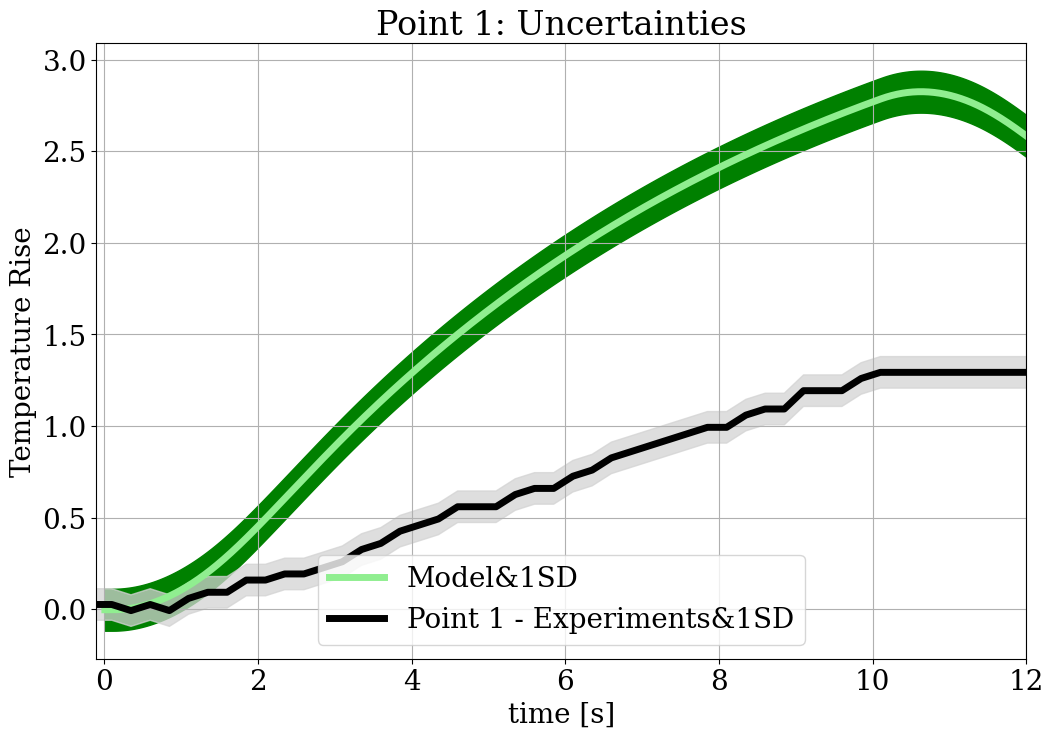

In [31]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.title('Point 1: Uncertainties')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSample1['Time [s]'],samplemeanP1, label='Model&1SD', color='lightgreen',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP1+1*np.max(samplestdP1),samplemeanP1-1*np.max(samplestdP1), color='green')

pyplot.plot(data_time[75:150]-19.65, average1,linestyle='-',label="Point 1 - Experiments&1SD",color="black",linewidth='5')
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.65,plus1, minus1, color="lightgray",alpha=0.75)
pyplot.grid()
pyplot.legend(loc='lower center');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point1_outputUncert_1sd_avg.png', dpi=300)

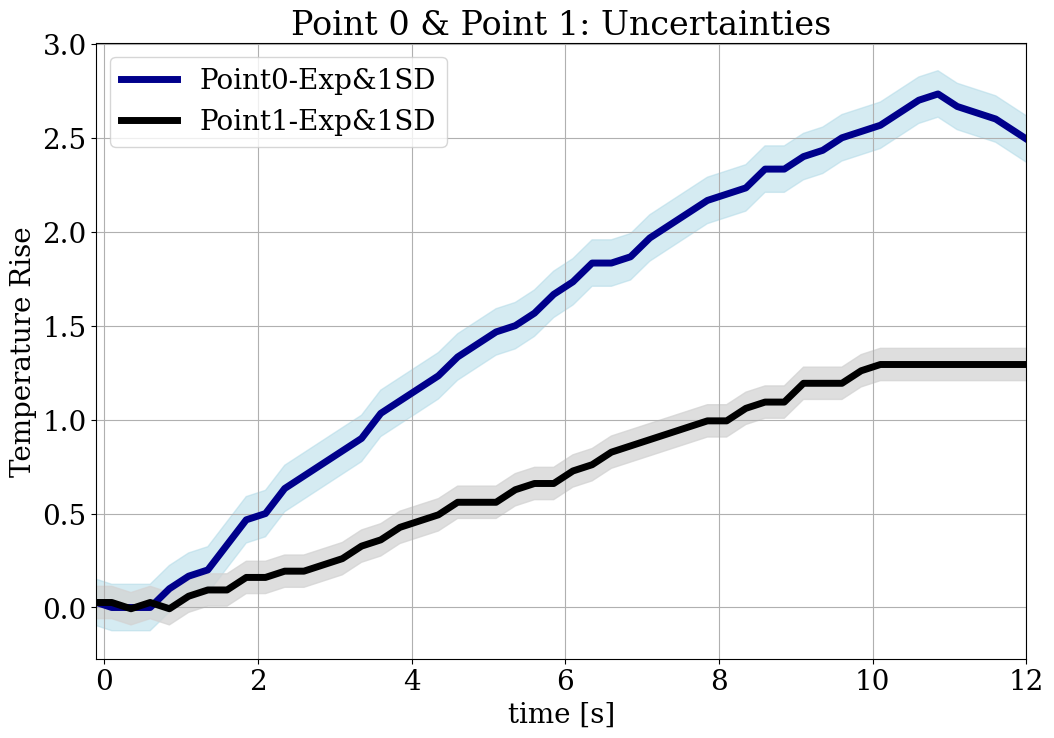

In [32]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.title('Point 0 & Point 1: Uncertainties')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# pyplot.plot(dataSample1['Time [s]'],samplemeanP0, label='Point0-Sim&1SD', color='magenta',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP0+1*np.max(samplestdP0),samplemeanP0-1*np.max(samplestdP0), color='purple',alpha=1.0)

# pyplot.plot(dataSample1['Time [s]'],samplemeanP1, label='Point1-Sim&1SD', color='lightgreen',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP1+1*np.max(samplestdP1),samplemeanP1-1*np.max(samplestdP1), color='green',alpha=0.6)

pyplot.plot(data_time[75:150]-19.65, average0,linestyle='-',label="Point0-Exp&1SD",color="darkblue",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus0, minus0, color="lightblue",alpha=0.5)

pyplot.plot(data_time[75:150]-19.65, average1,linestyle='-',label="Point1-Exp&1SD",color="black",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus1, minus1, color="lightgray",alpha=0.75)
pyplot.grid()
pyplot.legend(loc='upper left');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point0-1_outputUncert_1sd_avg_exp.png', dpi=300)

# Point 2

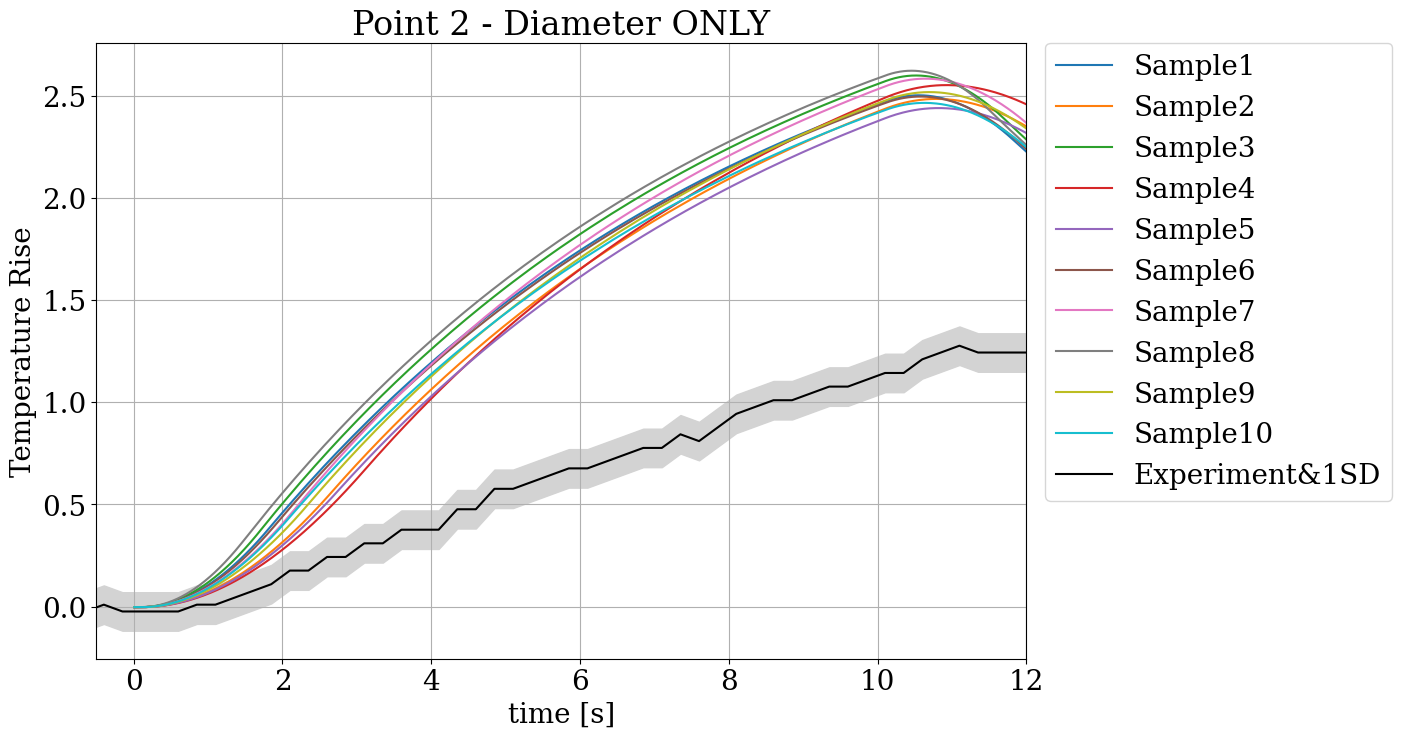

In [33]:
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# Diameter radius 2mm
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample1') 
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample2') 
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample3') 
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample4') 
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample6') 
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample7') 
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample8') 
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample9') 
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample10') 

pyplot.plot(data_time[75:150]-19.650, average2,linestyle='-',label="Experiment&1SD",color="black")
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.650,plus2, minus2, color="lightgray")

pyplot.grid()
pyplot.xlim([-0.5,12]);
pyplot.title('Point 2 - Diameter ONLY');
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point2_diameterONLY_1sd.png', dpi=300)

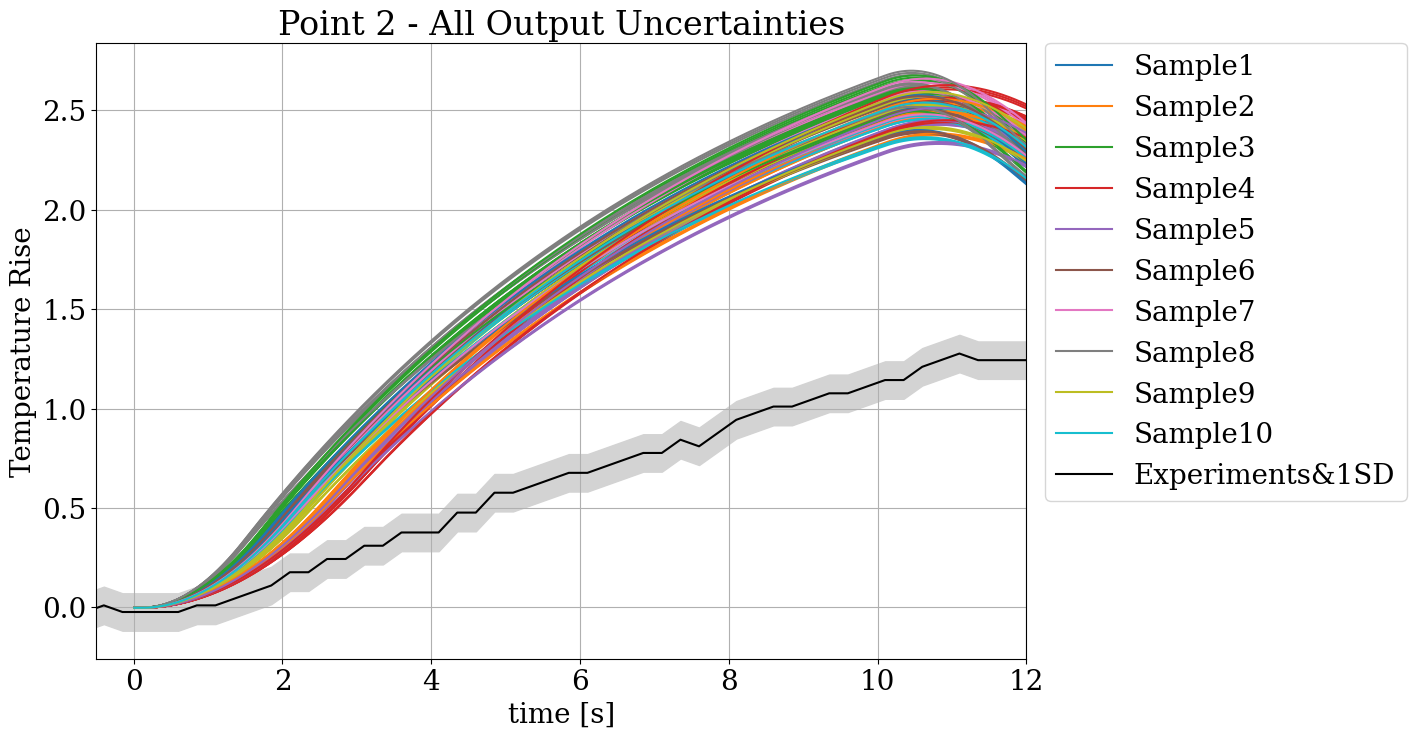

In [34]:
#### All Uncertainties
pyplot.figure(figsize=(12,8))
# Z 1mm above mouthpiece
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample1')
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample2')
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample3')
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample4')
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample6')
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample7')
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample8')
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample9')
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample10')

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]']-298.152039)

##### Z up
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]']-298.152039)

## Z down
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]']-298.152039)

pyplot.plot(data_time[75:150]-19.65, average2,linestyle='-',label="Experiments&1SD",color="black")
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.65,plus2, minus2, color="lightgray")

# pyplot.plot(data_time[75:150]-19.65, average4,linestyle='-',label="ExpAverage_Center",color="black")
# # pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
# pyplot.fill_between(data_time[75:150]-19.65,plus4, minus4, color="lightgray")
pyplot.grid()
pyplot.xlim([-0.5,12])
# pyplot.ylim([-0.25,5])
pyplot.title('Point 2 - All Output Uncertainties');
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point2_outputUncert_1sd_samples.png', dpi=300)

In [35]:
i = 0
samplemeanP2, samplestdP2 = [],[]
while i < len(dataSample1['Time [s]']):
    samplesall = [
        dataSample1['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm2mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm2mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp2mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp2mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp2mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp2mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown2mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown2mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown2mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown2mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown2mmTempzX0YdownZdpwm (Temperature) [K]'][i]-298.152039     
                 ]
    samplemeanP2.append(np.mean(samplesall))
    samplestdP2.append(np.std(samplesall))
    i +=1

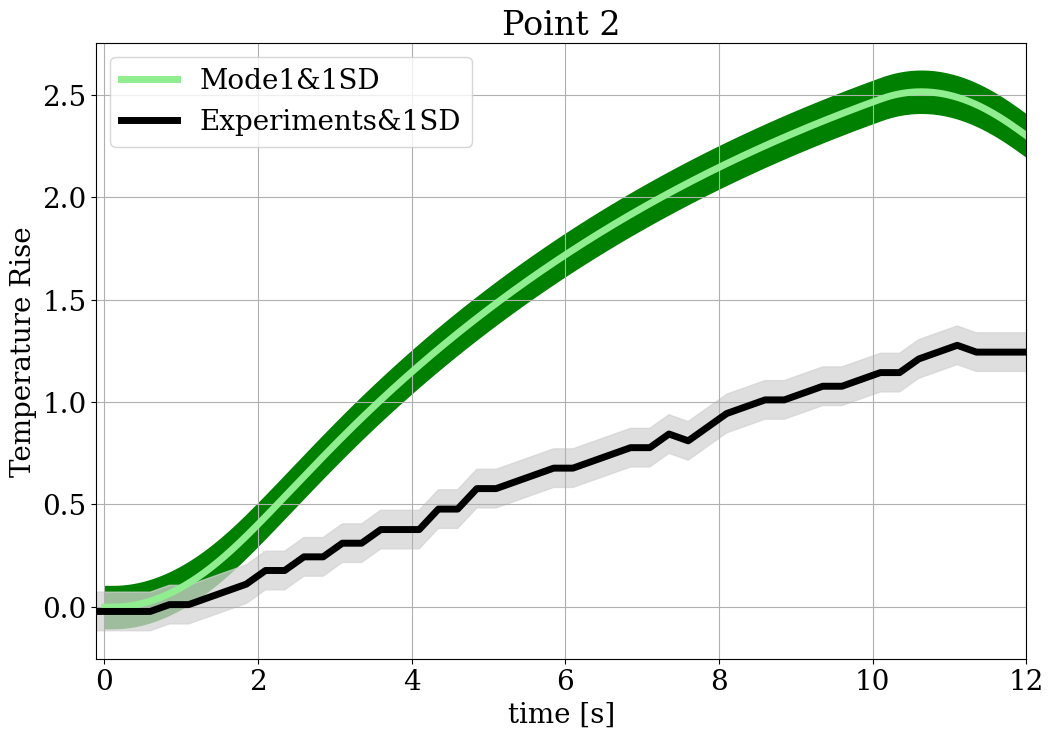

In [36]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.title('Point 2')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSample1['Time [s]'],samplemeanP2, label='Mode1&1SD', color='lightgreen',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP2+1*np.max(samplestdP2),samplemeanP2-1*np.max(samplestdP2), color='green')
pyplot.plot(data_time[75:150]-19.65, average2,linestyle='-',label="Experiments&1SD",color="black",linewidth='5')
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.65,plus2, minus2, color="lightgray",alpha=0.75)
pyplot.grid()
pyplot.legend(loc='upper left');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point2_outputUncert_1sd_avg.png', dpi=300)

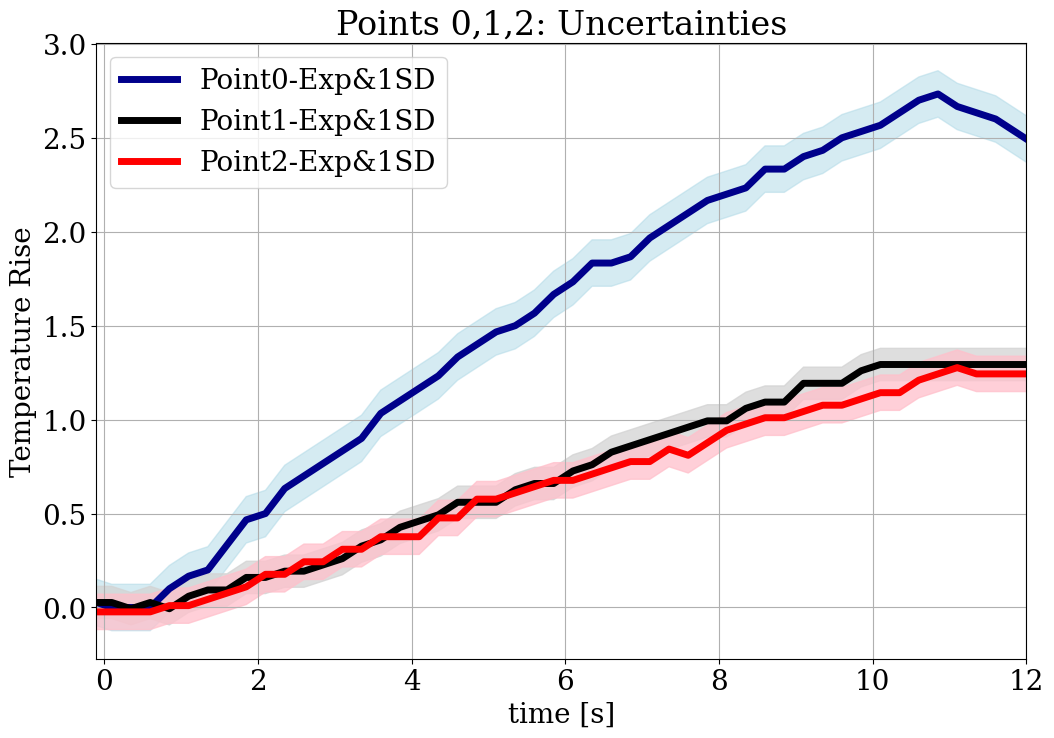

In [37]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.title('Points 0,1,2: Uncertainties')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# pyplot.plot(dataSample1['Time [s]'],samplemeanP0, label='Point0-Sim&1SD', color='magenta',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP0+1*np.max(samplestdP0),samplemeanP0-1*np.max(samplestdP0), color='purple',alpha=1.0)

# pyplot.plot(dataSample1['Time [s]'],samplemeanP1, label='Point1-Sim&1SD', color='lightgreen',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP1+1*np.max(samplestdP1),samplemeanP1-1*np.max(samplestdP1), color='green',alpha=0.6)

# pyplot.plot(dataSample1['Time [s]'],samplemeanP2, label='Point2-Sim&1SD', color='yellow',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP2+1*np.max(samplestdP2),samplemeanP2-1*np.max(samplestdP2), color='orange',alpha=0.6)

pyplot.plot(data_time[75:150]-19.65, average0,linestyle='-',label="Point0-Exp&1SD",color="darkblue",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus0, minus0, color="lightblue",alpha=0.5)

pyplot.plot(data_time[75:150]-19.65, average1,linestyle='-',label="Point1-Exp&1SD",color="black",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus1, minus1, color="lightgray",alpha=0.75)

pyplot.plot(data_time[75:150]-19.65, average2,linestyle='-',label="Point2-Exp&1SD",color="red",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus2, minus2, color="pink",alpha=0.75)

pyplot.grid()
pyplot.legend(loc='upper left');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point0-2_outputUncert_1sd_avg_exp.png', dpi=300)

# Point 3

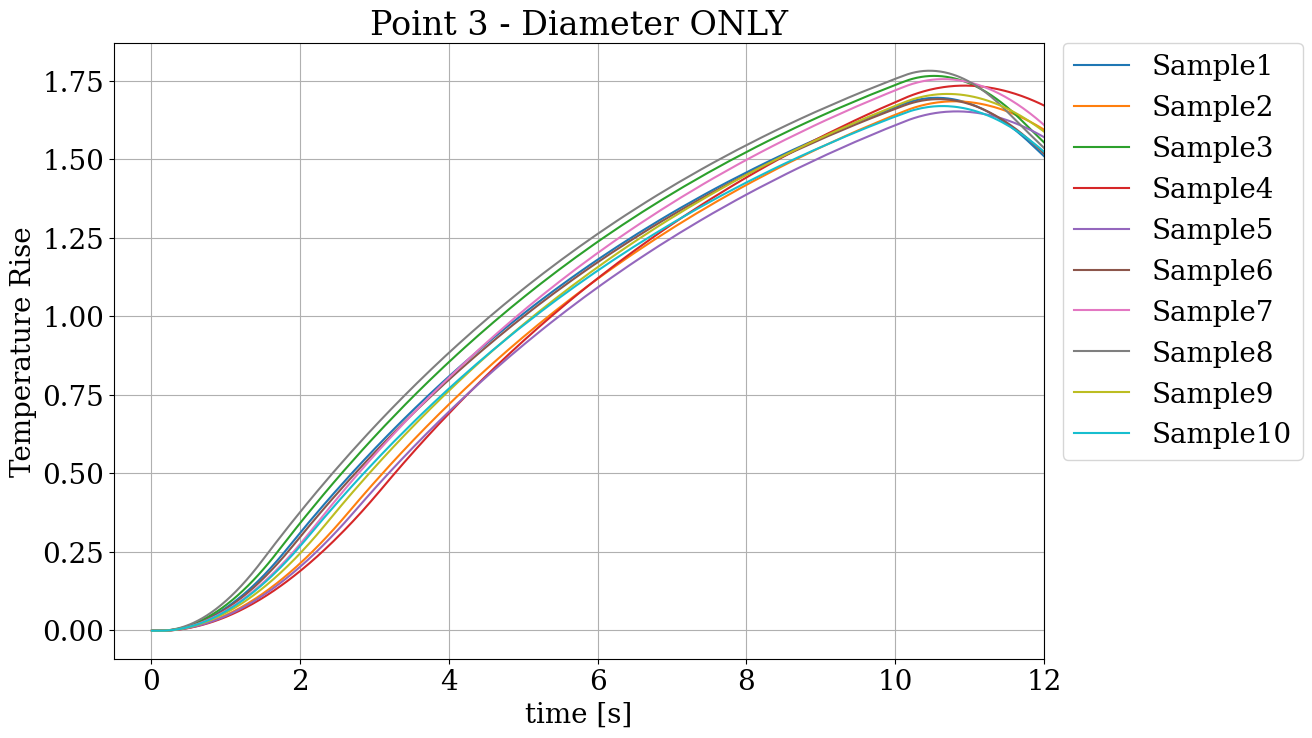

In [38]:
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# Diameter radius 2mm
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample1') 
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample2') 
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample3') 
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample4') 
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample6') 
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample7') 
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample8') 
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample9') 
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039,label='Sample10') 

pyplot.grid()
pyplot.xlim([-0.5,12]);
pyplot.title('Point 3 - Diameter ONLY');
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point3_diameterONLY_1sd.png', dpi=300)

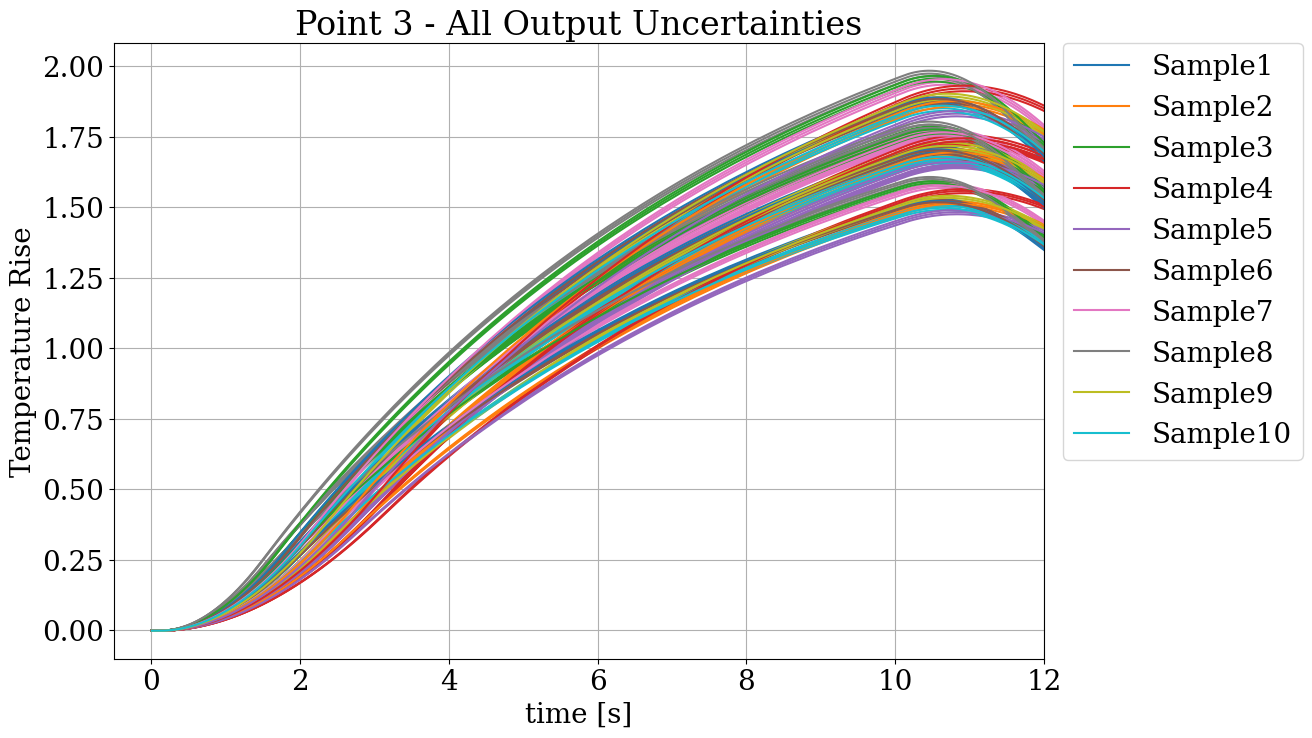

In [39]:
#### All Uncertainties
pyplot.figure(figsize=(12,8))
# Z 1mm above mouthpiece
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample1')
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample2')
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample3')
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample4')
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample6')
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample7')
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample8')
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample9')
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample10')

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]']-298.152039)

##### Z up
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]']-298.152039)

## Z down
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]']-298.152039)

pyplot.grid()
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.xlim([-0.5,12])
# pyplot.ylim([-0.25,5])
pyplot.title('Point 3 - All Output Uncertainties');
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point3_outputUncert_1sd_samples.png', dpi=300)

In [40]:
i = 0
samplemeanP3, samplestdP3 = [],[]
while i < len(dataSample1['Time [s]']):
    samplesall = [
        dataSample1['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm3mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm3mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm3mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm3mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp3mmTempzXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp3mmTempzX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp3mmTempzX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp3mmTempzX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown3mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown3mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown3mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown3mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown3mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039     
                 ]
    samplemeanP3.append(np.mean(samplesall))
    samplestdP3.append(np.std(samplesall))
    i +=1

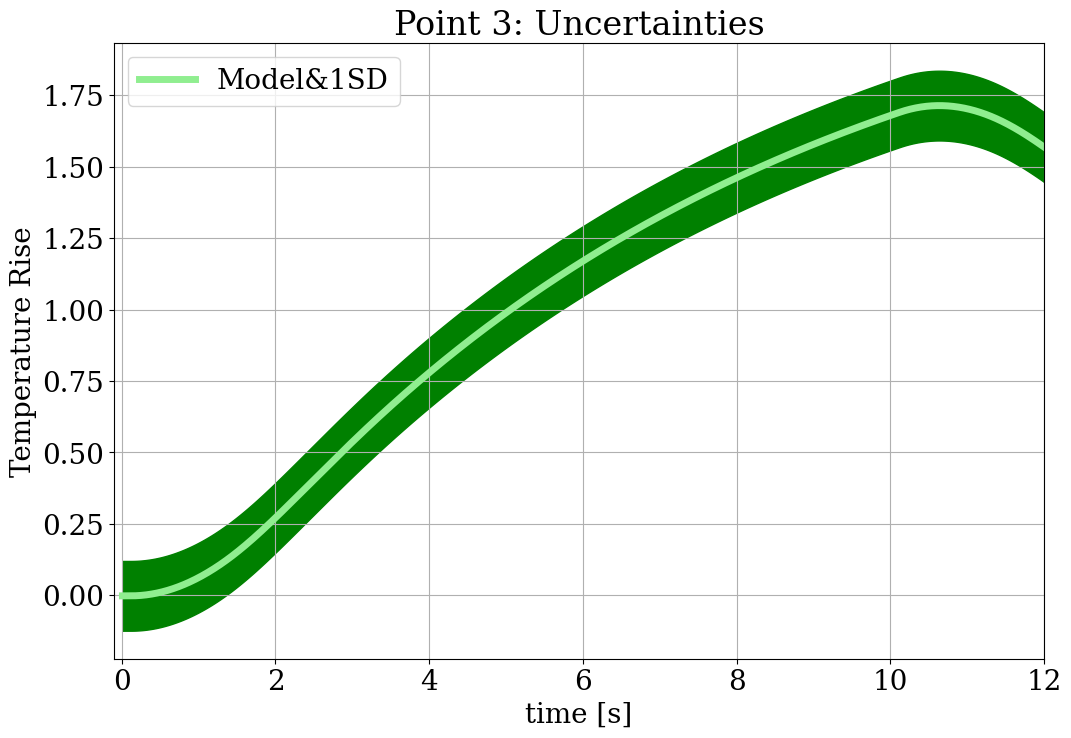

In [41]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.title('Point 3: Uncertainties')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSample1['Time [s]'],samplemeanP3, label='Model&1SD', color='lightgreen',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP3+1*np.max(samplestdP3),samplemeanP3-1*np.max(samplestdP3), color='green')
pyplot.grid()
pyplot.legend(loc='upper left');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point3_outputUncert_1sd_avg.png', dpi=300)

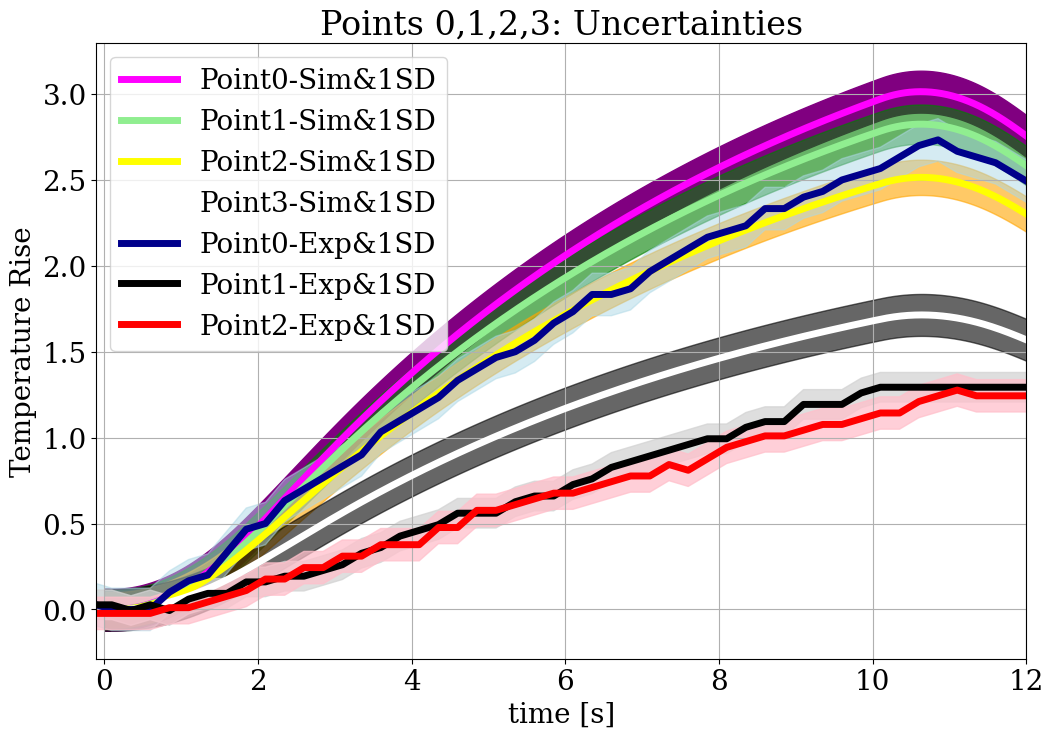

In [42]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.title('Points 0,1,2,3: Uncertainties')
pyplot.plot(dataSample1['Time [s]'],samplemeanP0, label='Point0-Sim&1SD', color='magenta',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP0+1*np.max(samplestdP0),samplemeanP0-1*np.max(samplestdP0), color='purple',alpha=1.0)

pyplot.plot(dataSample1['Time [s]'],samplemeanP1, label='Point1-Sim&1SD', color='lightgreen',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP1+1*np.max(samplestdP1),samplemeanP1-1*np.max(samplestdP1), color='green',alpha=0.6)

pyplot.plot(dataSample1['Time [s]'],samplemeanP2, label='Point2-Sim&1SD', color='yellow',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP2+1*np.max(samplestdP2),samplemeanP2-1*np.max(samplestdP2), color='orange',alpha=0.6)

pyplot.plot(dataSample1['Time [s]'],samplemeanP3, label='Point3-Sim&1SD', color='white',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP3+1*np.max(samplestdP3),samplemeanP3-1*np.max(samplestdP3), color='black',alpha=0.6)

pyplot.plot(data_time[75:150]-19.65, average0,linestyle='-',label="Point0-Exp&1SD",color="darkblue",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus0, minus0, color="lightblue",alpha=0.5)

pyplot.plot(data_time[75:150]-19.65, average1,linestyle='-',label="Point1-Exp&1SD",color="black",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus1, minus1, color="lightgray",alpha=0.75)

pyplot.plot(data_time[75:150]-19.65, average2,linestyle='-',label="Point2-Exp&1SD",color="red",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus2, minus2, color="pink",alpha=0.75)

pyplot.grid()
pyplot.legend(loc='upper left');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point0-3_outputUncert_1sd_avg_all.png', dpi=300)

# Point 4

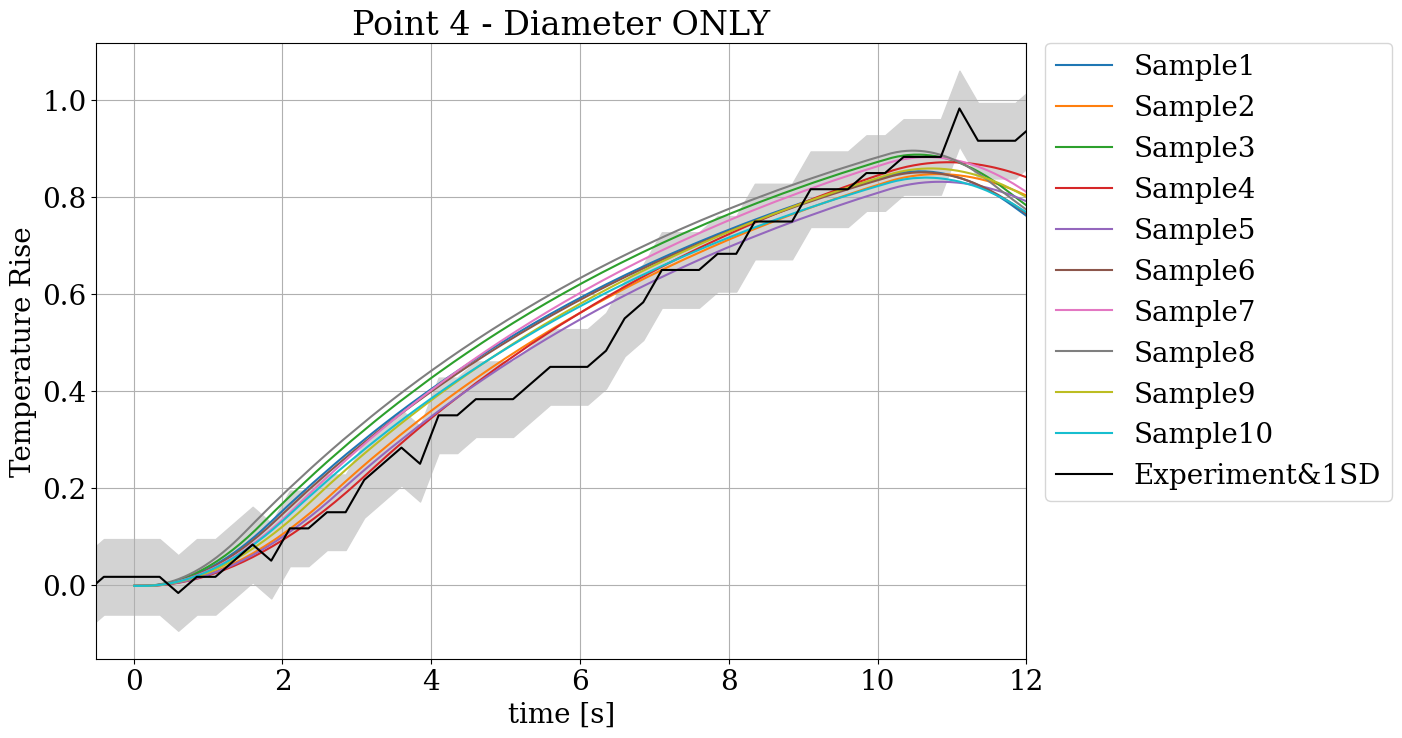

In [43]:
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# Diameter radius 4
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample1') 
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample2') 
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample3') 
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample4') 
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample6') 
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample7') 
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample8') 
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample9') 
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039,label='Sample10') 

pyplot.plot(data_time[75:150]-19.650, average4,linestyle='-',label="Experiment&1SD",color="black")
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.650,plus4, minus4, color="lightgray")

pyplot.grid()
pyplot.xlim([-0.5,12]);
pyplot.title('Point 4 - Diameter ONLY');
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point4_diameterONLY_1sd.png', dpi=300)

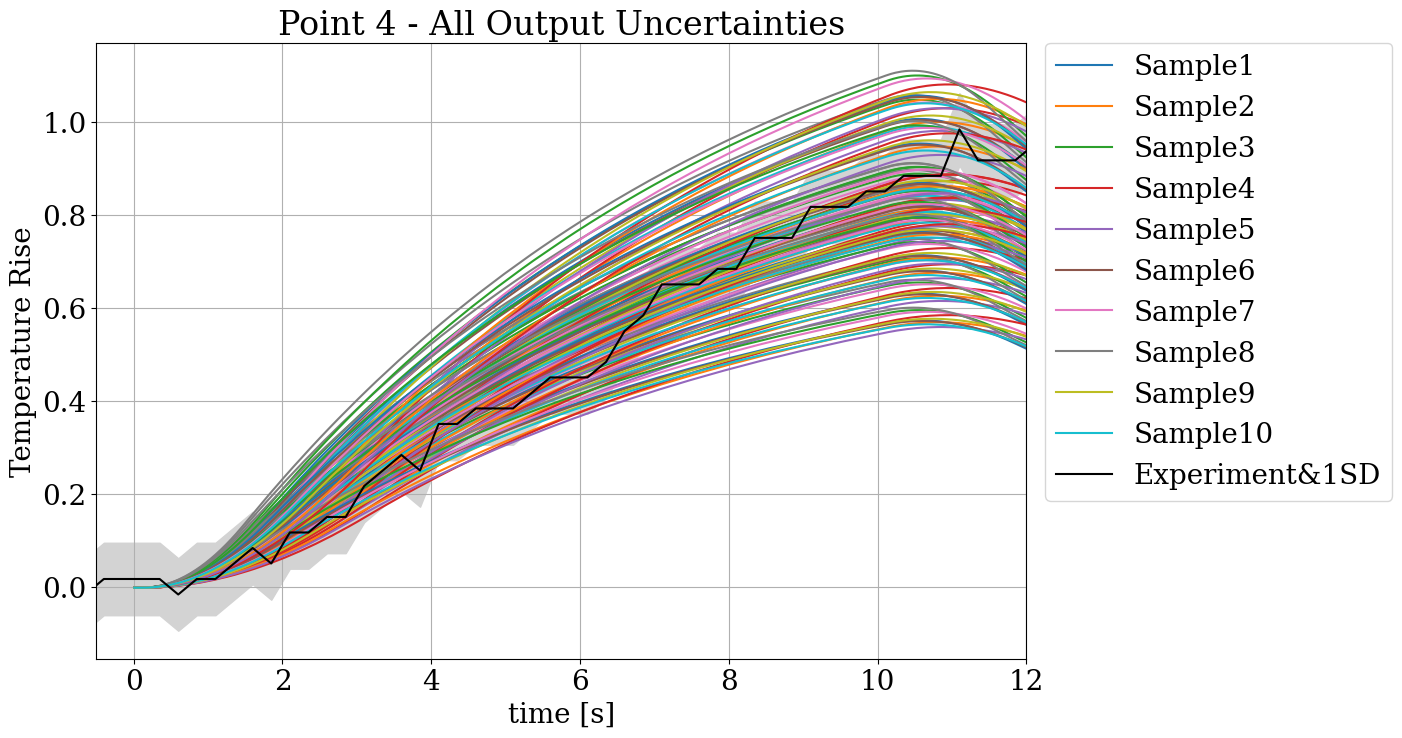

In [44]:
#### All Uncertainties
pyplot.figure(figsize=(12,8))
# Z 1mm above mouthpiece
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample1')
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample2')
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample3')
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample4')
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample5')
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample6')
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample7')
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample8')
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample9')
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]']-298.152039, label='Sample10')

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]']-298.152039)

##### Z up
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]']-298.152039)

## Z down
pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]']-298.152039)

pyplot.plot(dataSample1[headerLabels[0]],dataSample1['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample2[headerLabels[0]],dataSample2['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample3[headerLabels[0]],dataSample3['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample4[headerLabels[0]],dataSample4['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample5[headerLabels[0]],dataSample5['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample6[headerLabels[0]],dataSample6['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample7[headerLabels[0]],dataSample7['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample8[headerLabels[0]],dataSample8['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample9[headerLabels[0]],dataSample9['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)
pyplot.plot(dataSample10[headerLabels[0]],dataSample10['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]']-298.152039)

pyplot.plot(data_time[75:150]-19.65, average4,linestyle='-',label="Experiment&1SD",color="black")
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.65,plus4, minus4, color="lightgray")
pyplot.grid()
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.xlim([-0.5,12])
# pyplot.ylim([-0.25,5])
pyplot.title('Point 4 - All Output Uncertainties');
pyplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
pyplot.savefig('figures/sim_point4_outputUncert_1sd_samples.png', dpi=300)

In [45]:
i = 0
samplemeanP4, samplestdP4 = [],[]
while i < len(dataSample1['Time [s]']):
    samplesall = [
        dataSample1['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm4mmTempXupYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm4mmTempX0YupZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: Mouthpiece1mm4mmTempX0YdownZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp4mmTempXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp4mmTempXupYZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp4mmTempX0YZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp4mmTempX0YupZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceUp4mmTempX0YdownZup (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown4mmTempzXdownYZ (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown4mmTempzXupYZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown4mmTempzX0YZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown4mmTempzX0YupZdown (Temperature) [K]'][i]-298.152039
        ,dataSample1['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample2['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample3['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample4['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample5['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample6['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample7['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample8['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample9['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
        ,dataSample10['Monitor Point: MouthpieceDown4mmTempzX0YdownZdown (Temperature) [K]'][i]-298.152039
                 ]
    samplemeanP4.append(np.mean(samplesall))
    samplestdP4.append(np.std(samplesall))
    i +=1

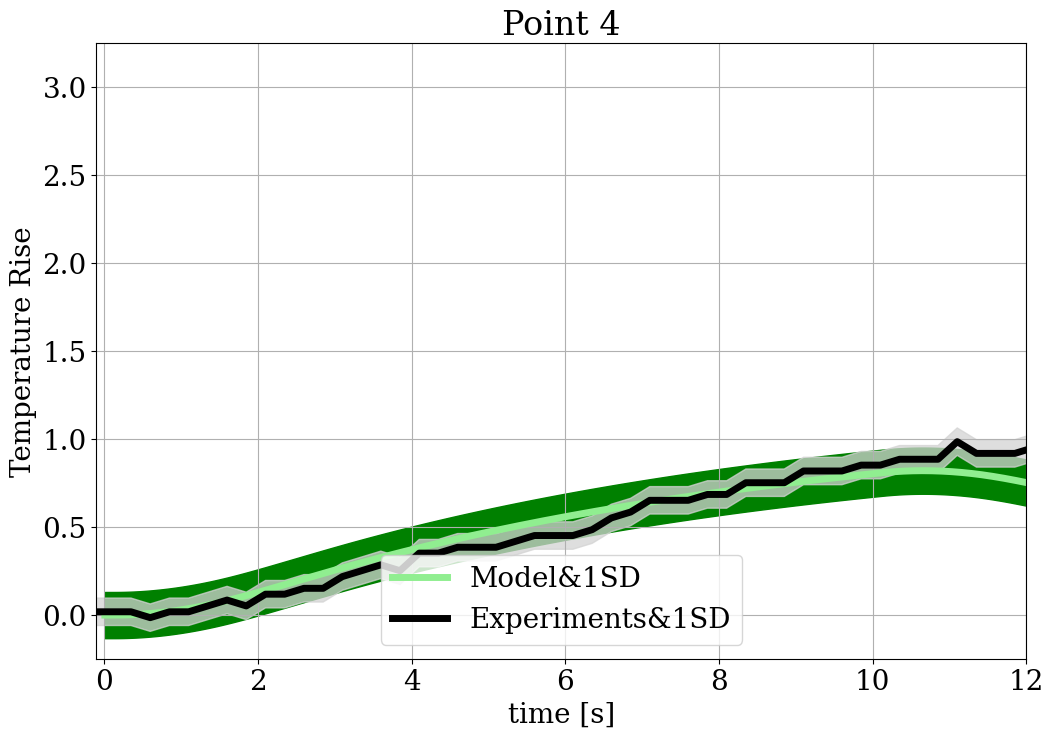

In [46]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.title('Point 4')
pyplot.plot(dataSample1['Time [s]'],samplemeanP4, label='Model&1SD', color='lightgreen',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP4+1*np.max(samplestdP4),samplemeanP4-1*np.max(samplestdP4), color='green')
pyplot.plot(data_time[75:150]-19.65, average4,linestyle='-',label="Experiments&1SD",color="black",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus4, minus4, color="lightgray",alpha=0.75)
pyplot.grid()
pyplot.legend(loc='lower center');
pyplot.xlim(-0.1,12);
pyplot.ylim(-0.25,3.25);
pyplot.savefig('figures/sim_point4_outputUncert_1sd_avg.png', dpi=300)

## All

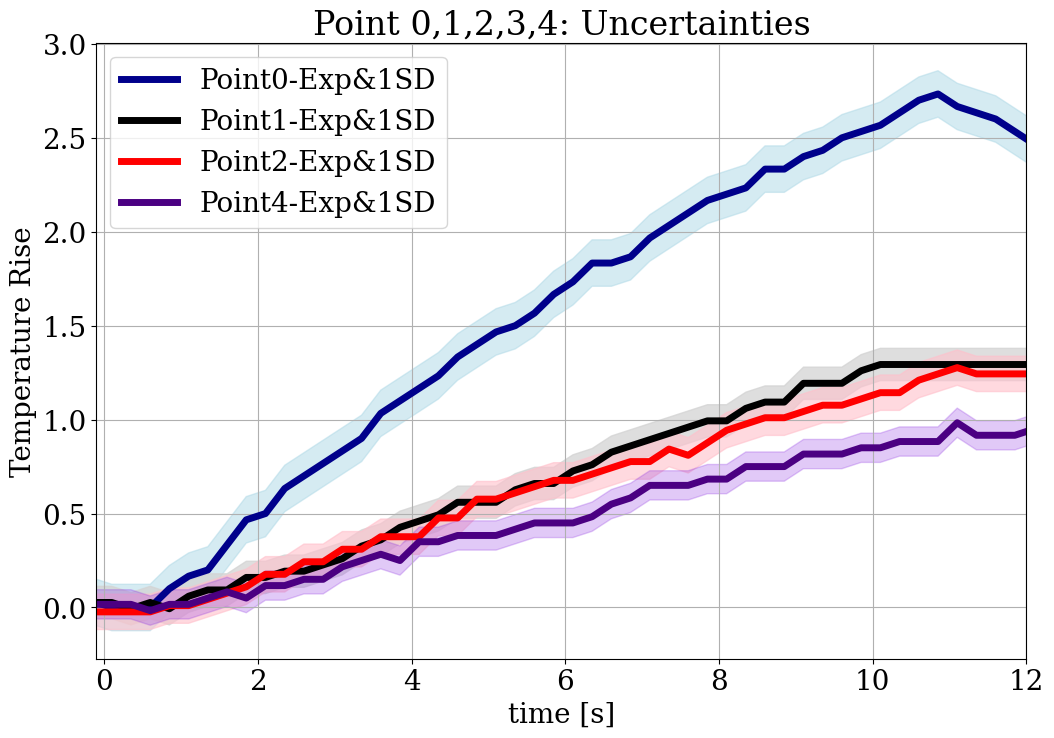

In [47]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.title('Point 0,1,2,3,4: Uncertainties')
# pyplot.plot(dataSample1['Time [s]'],samplemeanP0, label='Point0-Sim&1SD', color='magenta',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP0+1*np.max(samplestdP0),samplemeanP0-1*np.max(samplestdP0), color='purple',alpha=1.0)

# pyplot.plot(dataSample1['Time [s]'],samplemeanP1, label='Point1-Sim&1SD', color='lightgreen',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP1+1*np.max(samplestdP1),samplemeanP1-1*np.max(samplestdP1), color='green',alpha=0.6)

# pyplot.plot(dataSample1['Time [s]'],samplemeanP2, label='Point2-Sim&1SD', color='yellow',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP2+1*np.max(samplestdP2),samplemeanP2-1*np.max(samplestdP2), color='orange',alpha=0.6)

# pyplot.plot(dataSample1['Time [s]'],samplemeanP3, label='Point3-Sim&1SD', color='white',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP3+1*np.max(samplestdP3),samplemeanP3-1*np.max(samplestdP3), color='black',alpha=0.6)

# pyplot.plot(dataSample1['Time [s]'],samplemeanP4, label='Point4-Sim&1SD', color='cyan',linewidth='5')
# pyplot.fill_between(dataSample1['Time [s]'],samplemeanP4+1*np.max(samplestdP4),samplemeanP4-1*np.max(samplestdP4), color='cadetblue')

pyplot.plot(data_time[75:150]-19.65, average0,linestyle='-',label="Point0-Exp&1SD",color="darkblue",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus0, minus0, color="lightblue",alpha=0.5)

pyplot.plot(data_time[75:150]-19.65, average1,linestyle='-',label="Point1-Exp&1SD",color="black",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus1, minus1, color="lightgray",alpha=0.75)

pyplot.plot(data_time[75:150]-19.65, average2,linestyle='-',label="Point2-Exp&1SD",color="red",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus2, minus2, color="pink",alpha=0.6)

pyplot.plot(data_time[75:150]-19.65, average4,linestyle='-',label="Point4-Exp&1SD",color="indigo",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus4, minus4, color="blueviolet",alpha=0.25)

pyplot.grid()
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.legend(loc='upper left');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point0-4_outputUncert_1sd_avg_exp.png', dpi=300)

### Average& Standard Deviations of Samples
Note this is over all samples at 1 location along the diameter. It doesn't account for the other uncertainties based on location of data collection. 

### Combining 0mm and 1mm samples 

In [48]:
i = 0
samplemean, samplestd = [],[]
while i < len(dataSample1['Time [s]']):
    s1_0=dataSample1['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s2_0=dataSample2['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s3_0=dataSample3['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s4_0=dataSample4['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s5_0=dataSample5['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s6_0=dataSample6['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s7_0=dataSample7['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s8_0=dataSample8['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s9_0=dataSample9['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s10_0=dataSample10['Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]'][i]-298.152039
    
    s1_1=dataSample1['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s2_1=dataSample2['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s3_1=dataSample3['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s4_1=dataSample4['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s5_1=dataSample5['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s6_1=dataSample6['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s7_1=dataSample7['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s8_1=dataSample8['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s9_1=dataSample9['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s10_1=dataSample10['Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]'][i]-298.152039
    
    s1_2=dataSample1['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s2_2=dataSample2['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s3_2=dataSample3['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s4_2=dataSample4['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s5_2=dataSample5['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s6_2=dataSample6['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s7_2=dataSample7['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s8_2=dataSample8['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s9_2=dataSample9['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    s10_2=dataSample10['Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]'][i]-298.152039
    
    samples = [s1_0,s2_0,s3_0,s4_0,s5_0,s6_0,s7_0,s8_0,s9_0,s10_0,
               s1_1,s2_1,s3_1,s4_1,s5_1,s6_1,s7_1,s8_1,s9_1,s10_1,
               s1_2,s2_2,s3_2,s4_2,s5_2,s6_2,s7_2,s8_2,s9_2,s10_2]
    samplemean.append(np.mean(samples))
    samplestd.append(np.std(samples))
    i +=1

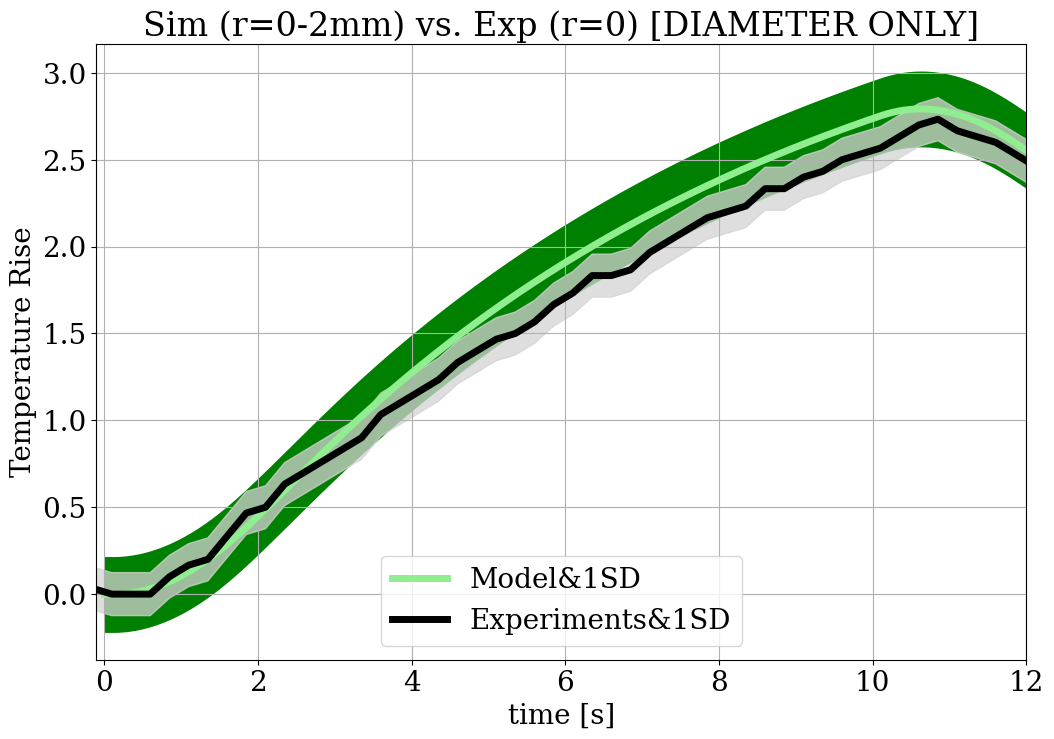

In [49]:
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.title('Sim (r=0-2mm) vs. Exp (r=0) [DIAMETER ONLY]')
pyplot.plot(dataSample1['Time [s]'],samplemean, label='Model&1SD', color='lightgreen',linewidth=5)
pyplot.fill_between(dataSample1['Time [s]'],samplemean+1*np.max(samplestd),samplemean-1*np.max(samplestd), color='green')
pyplot.plot(data_time[75:150]-19.65, average0,linestyle='-',label="Experiments&1SD",color="black",linewidth=5)
# pyplot.fill_between(data_time[75:150]-19.650,erravgplus0, erravgminus0, color="lightgreen")
pyplot.fill_between(data_time[75:150]-19.65,plus0, minus0, color="lightgray",alpha=0.75)
pyplot.grid()
pyplot.legend(loc='lower center');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point0-2_vs_exppoint0_avg.png', dpi=300)


In [50]:
#Got these values from LHS_samples_v1.out
velocity = ['VFR [L/min]',0.49443986342754215,0.49727473790757359,0.50662655679974711,0.50958889995235945,0.49179642068222162,0.49413438308052721,0.50741464606951925,0.50837221808731559,0.49976822379976510,0.49110360241495071]
power = ['Power[W]',0.99985413804277778,1.0002659078601281,0.99979680049582387,1.0004908209322021,1.0003082816863897,0.99989673660648992,1.0000184179912321,0.99968772122613159,1.0001117438615765,0.99998663799837229]
#Got these values from LHS_samples_v5.out
powerOnOff = ['Time to Max Power[s]',1.7082760855555534,2.5318157202564180,1.5936009916476905,2.9816418644040823,2.6165633727796376,1.7934732129797339,2.0368359824642539,1.3754424522630870,2.2234877231530845,1.9732759967446327]
samplesNames = ['','Sample1','Sample2','Sample3','Sample4','Sample5',
               'Sample6','Sample7','Sample8','Sample9','Sample10']
inputsProp = pd.DataFrame([samplesNames,velocity,power,powerOnOff])
inputsPropTrans = inputsProp.transpose()
inputsPropTrans 
# Specifications
# 1)velocity [0.49-0.51], 2)power [0.9995,1.0005], 3)powerduration[1,3] 
# All are Uniform Distributions 

0            1         2                     3
0             VFR [L/min]  Power[W]  Time to Max Power[s]
1    Sample1      0.49444  0.999854              1.708276
2    Sample2     0.497275  1.000266              2.531816
3    Sample3     0.506627  0.999797              1.593601
4    Sample4     0.509589  1.000491              2.981642
5    Sample5     0.491796  1.000308              2.616563
6    Sample6     0.494134  0.999897              1.793473
7    Sample7     0.507415  1.000018              2.036836
8    Sample8     0.508372  0.999688              1.375442
9    Sample9     0.499768  1.000112              2.223488
10  Sample10     0.491104  0.999987              1.973276

# Timestep Specific Analysis

In [51]:
headerLabels = dataSample1.columns
# timesteps = [0.100000001,1.0,2.0,4.0,5.0,10.0,11.0,12.0]
timesteps = [0.25,2,4,6,8,10,11.5] #sim
timestepe = [0.25,2,4,6,8,10,11.5] #exp
# Simulation
timesim = pd.DataFrame([dataSample1[headerLabels[0]],dataSample2[headerLabels[0]],dataSample3[headerLabels[0]],dataSample4[headerLabels[0]],dataSample5[headerLabels[0]],dataSample6[headerLabels[0]],dataSample7[headerLabels[0]],dataSample8[headerLabels[0]],dataSample9[headerLabels[0]],dataSample10[headerLabels[0]]])                                                                         
timezim = timesim.transpose()
# Experiments
timeexp = data_time

my_listsim = [dataSample1[headerLabels[0]]]
my_listsim = list(my_listsim[0][0:])
# timesId = my_list.index(0.25)
timesIdSim = [my_listsim.index(timesteps[0]),my_listsim.index(timesteps[1]),my_listsim.index(timesteps[2]),
           my_listsim.index(timesteps[3]),my_listsim.index(timesteps[4]),my_listsim.index(timesteps[5]),
           my_listsim.index(timesteps[6])]
# use these for simulations: timesteps, timesIdSim

my_listexp = [data_time]
my_listexp = list(my_listexp[0][0:])
# timesId = my_list.index(0.25)
timesIdExp = [my_listexp.index(timestepe[0]),my_listexp.index(timestepe[1]),my_listexp.index(timestepe[2]),
           my_listexp.index(timestepe[3]),my_listexp.index(timestepe[4]),my_listexp.index(timestepe[5]),
           my_listexp.index(timestepe[6])]
# use these for experiments: timesteps, timesIdExp

time0,time2,time4,time6,time8,time10,time12=timestepe[0],timestepe[1],timestepe[2],timestepe[3],timestepe[4],timestepe[5],timestepe[6]

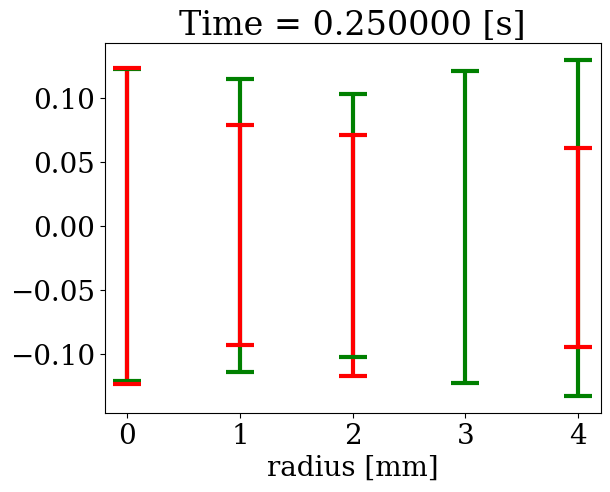

In [52]:
# t = 0 
pyplot.title('Time = %f [s]' %time0)
pyplot.xlabel('radius [mm]')
pyplot.errorbar(0,samplemeanP0[timesIdSim[0]], yerr=np.max(samplestdP0), capsize=10, elinewidth=3, markeredgewidth=3,color='green',label='Simulations')
pyplot.errorbar(1,samplemeanP1[timesIdSim[0]], yerr=np.max(samplestdP1), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(2,samplemeanP2[timesIdSim[0]], yerr=np.max(samplestdP2), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(3,samplemeanP3[timesIdSim[0]], yerr=np.max(samplestdP3), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(4,samplemeanP4[timesIdSim[0]], yerr=np.max(samplestdP4), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
# pyplot.errorbar(0,samplemean[timesIdSim[0]], yerr=samplestd[timesIdSim[0]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')


pyplot.errorbar(0,average0[timesIdExp[0]], yerr=np.max(sDev0), capsize=10, elinewidth=3, markeredgewidth=3, color='red',label='Experiments')
pyplot.errorbar(1,average1[timesIdExp[0]], yerr=np.max(sDev1), capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(2,average2[timesIdExp[0]], yerr=np.max(sDev2), capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(4,average4[timesIdExp[0]], yerr=np.max(sDev4), capsize=10, elinewidth=3, markeredgewidth=3, color='red')

# pyplot.ylim(-0.0021,-0.0019)
pyplot.show()

In [67]:
diff0 = np.abs(samplemeanP0[timesIdSim[0]] - average0[timesIdExp[0]])/(samplemeanP0[timesIdSim[0]] + average0[timesIdExp[0]])/2
# diff0 = (samplemean[timesIdSim[0]] - average0[timesIdExp[0]])/(samplemean[timesIdSim[0]] - average0[timesIdExp[0]])/(
diff1 = np.abs(samplemeanP1[timesIdSim[0]] - average1[timesIdExp[0]])/(samplemeanP1[timesIdSim[0]] + average1[timesIdExp[0]])/2
diff2 = np.abs(samplemeanP2[timesIdSim[0]] - average2[timesIdExp[0]])/(samplemeanP2[timesIdSim[0]] + average2[timesIdExp[0]])/2
diff4 = np.abs(samplemeanP4[timesIdSim[0]] - average4[timesIdExp[0]])/(samplemeanP4[timesIdSim[0]] + average4[timesIdExp[0]])/2

print('diff0 = ', np.abs(diff0)*100)
print('diff1 = ', np.abs(diff1)*100)
print('diff2 = ', np.abs(diff2)*100)
print('diff4 = ', np.abs(diff4)*100)

diff0 =  50.0
diff1 =  62.39251061263874
diff2 =  51.40997532259114
diff4 =  42.16610248722963


In [102]:
average4[timesIdExp[0]]

-0.016666666666666666

In [135]:
# timestep = [0.25,2,4,6,8,10,11.5] #exp
diffr0t0 = np.abs(samplemeanP0[timesIdSim[0]] - average0[timesIdExp[0]])/(samplemeanP0[timesIdSim[0]] + average0[timesIdExp[0]])/2
diffr1t0 = np.abs(samplemeanP1[timesIdSim[0]] - average1[timesIdExp[0]])/(samplemeanP1[timesIdSim[0]] + average1[timesIdExp[0]])/2
diffr2t0 = np.abs(samplemeanP2[timesIdSim[0]] - average2[timesIdExp[0]])/(samplemeanP2[timesIdSim[0]] + average2[timesIdExp[0]])/2
diffr4t0 = np.abs(samplemeanP4[timesIdSim[0]] - average4[timesIdExp[0]])/(samplemeanP4[timesIdSim[0]] + average4[timesIdExp[0]])/2

diffr0t2 = np.abs(samplemeanP0[timesIdSim[1]] - average0[timesIdExp[1]])/(samplemeanP0[timesIdSim[1]] + average0[timesIdExp[1]])/2
diffr1t2 = np.abs(samplemeanP1[timesIdSim[1]] - average1[timesIdExp[1]])/(samplemeanP1[timesIdSim[1]] + average1[timesIdExp[1]])/2
diffr2t2 = np.abs(samplemeanP2[timesIdSim[1]] - average2[timesIdExp[1]])/(samplemeanP2[timesIdSim[1]] + average2[timesIdExp[1]])/2
diffr4t2 = np.abs(samplemeanP4[timesIdSim[1]] - average4[timesIdExp[1]])/(samplemeanP4[timesIdSim[1]] + average4[timesIdExp[1]])/2

diffr0t4 = np.abs(samplemeanP0[timesIdSim[2]] - average0[timesIdExp[2]])/(samplemeanP0[timesIdSim[2]] + average0[timesIdExp[2]])/2
diffr1t4 = np.abs(samplemeanP1[timesIdSim[2]] - average1[timesIdExp[2]])/(samplemeanP1[timesIdSim[2]] + average1[timesIdExp[2]])/2
diffr2t4 = np.abs(samplemeanP2[timesIdSim[2]] - average2[timesIdExp[2]])/(samplemeanP2[timesIdSim[2]] + average2[timesIdExp[2]])/2
diffr4t4 = np.abs(samplemeanP4[timesIdSim[2]] - average4[timesIdExp[2]])/(samplemeanP4[timesIdSim[2]] + average4[timesIdExp[2]])/2

diffr0t6 = np.abs(samplemeanP0[timesIdSim[3]] - average0[timesIdExp[3]])/(samplemeanP0[timesIdSim[3]] + average0[timesIdExp[3]])/2
diffr1t6 = np.abs(samplemeanP1[timesIdSim[3]] - average1[timesIdExp[3]])/(samplemeanP1[timesIdSim[3]] + average1[timesIdExp[3]])/2
diffr2t6 = np.abs(samplemeanP2[timesIdSim[3]] - average2[timesIdExp[3]])/(samplemeanP2[timesIdSim[3]] + average2[timesIdExp[3]])/2
diffr4t6 = np.abs(samplemeanP4[timesIdSim[3]] - average4[timesIdExp[3]])/(samplemeanP4[timesIdSim[3]] + average4[timesIdExp[3]])/2

diffr0t8 = np.abs(samplemeanP0[timesIdSim[4]] - average0[timesIdExp[4]])/(samplemeanP0[timesIdSim[4]] + average0[timesIdExp[4]])/2
diffr1t8 = np.abs(samplemeanP1[timesIdSim[4]] - average1[timesIdExp[4]])/(samplemeanP1[timesIdSim[4]] + average1[timesIdExp[4]])/2
diffr2t8 = np.abs(samplemeanP2[timesIdSim[4]] - average2[timesIdExp[4]])/(samplemeanP2[timesIdSim[4]] + average2[timesIdExp[4]])/2
diffr4t8 = np.abs(samplemeanP4[timesIdSim[4]] - average4[timesIdExp[4]])/(samplemeanP4[timesIdSim[4]] + average4[timesIdExp[4]])/2

diffr0t10 = np.abs(samplemeanP0[timesIdSim[5]] - average0[timesIdExp[5]])/(samplemeanP0[timesIdSim[5]] + average0[timesIdExp[5]])/2
diffr1t10 = np.abs(samplemeanP1[timesIdSim[5]] - average1[timesIdExp[5]])/(samplemeanP1[timesIdSim[5]] + average1[timesIdExp[5]])/2
diffr2t10 = np.abs(samplemeanP2[timesIdSim[5]] - average2[timesIdExp[5]])/(samplemeanP2[timesIdSim[5]] + average2[timesIdExp[5]])/2
diffr4t10 = np.abs(samplemeanP4[timesIdSim[5]] - average4[timesIdExp[5]])/(samplemeanP4[timesIdSim[5]] + average4[timesIdExp[5]])/2

diffr0t11 = np.abs(samplemeanP0[timesIdSim[6]] - average0[timesIdExp[6]])/(samplemeanP0[timesIdSim[6]] + average0[timesIdExp[6]])/2
diffr1t11 = np.abs(samplemeanP1[timesIdSim[6]] - average1[timesIdExp[6]])/(samplemeanP1[timesIdSim[6]] + average1[timesIdExp[6]])/2
diffr2t11 = np.abs(samplemeanP2[timesIdSim[6]] - average2[timesIdExp[6]])/(samplemeanP2[timesIdSim[6]] + average2[timesIdExp[6]])/2
diffr4t11 = np.abs(samplemeanP4[timesIdSim[6]] - average4[timesIdExp[6]])/(samplemeanP4[timesIdSim[6]] + average4[timesIdExp[6]])/2


diffr0 = np.array([100*diffr0t0,100*diffr0t2,100*diffr0t4,100*diffr0t6,100*diffr0t8,100*diffr0t10,100*diffr0t11,100*np.mean([[diffr0t2,diffr0t4,diffr0t6,diffr0t8,diffr0t10,diffr0t11]])])
diffr1 = np.array([100*diffr1t0,100*diffr1t2,100*diffr1t4,100*diffr1t6,100*diffr1t8,100*diffr1t10,100*diffr1t11,100*np.mean([[diffr1t2,diffr1t4,diffr1t6,diffr1t8,diffr1t10,diffr1t11]])])
diffr2 = np.array([100*diffr2t0,100*diffr2t2,100*diffr2t4,100*diffr2t6,100*diffr2t8,100*diffr2t10,100*diffr2t11,100*np.mean([[diffr2t2,diffr2t4,diffr2t6,diffr2t8,diffr2t10,diffr2t11]])])
diffr4 = np.array([100*diffr4t0,100*diffr4t2,100*diffr4t4,100*diffr4t6,100*diffr4t8,100*diffr4t10,100*diffr4t11,100*np.mean([[diffr4t2,diffr4t4,diffr4t6,diffr4t8,diffr4t10,diffr4t11]])])

d = {"time (s)": [0,2,4,6,8,10,11,'avg all time'],"r = 0 mm": np.abs(diffr0), "r = 1 mm": np.abs(diffr1),"r = 2 mm": np.abs(diffr2), "r = 4 mm": np.abs(diffr4)}
df = pd.DataFrame(d)
df

time (s)   r = 0 mm   r = 1 mm   r = 2 mm   r = 4 mm
0             0  50.000000  62.392511  51.409975  42.166102
1             2  24.342028  38.279944  47.566219  38.364544
2             4  12.261031  33.203921  28.701597  13.028831
3             6   8.416937  27.516167  24.870299   9.222264
4             8   6.672923  22.962163  23.423702   1.734490
5            10   5.180278  19.883799  20.261784   0.475657
6            11   1.816322  17.786490  16.702597   2.781534
7  avg all time   9.781586  26.605414  26.921033  10.934553

In [151]:
diffr0_p = np.array([100*diffr0t2,100*diffr0t6,100*diffr0t10,100*diffr0t11])#,100*np.mean([[diffr0t0,diffr0t2,diffr0t6,diffr0t10,diffr0t11]])])
diffr1_p = np.array([100*diffr1t2,100*diffr1t6,100*diffr1t10,100*diffr1t11])#,100*np.mean([[diffr1t0,diffr1t2,diffr1t6,diffr1t10,diffr1t11]])])
diffr2_p = np.array([100*diffr2t2,100*diffr2t6,100*diffr2t10,100*diffr2t11])#,100*np.mean([[diffr2t0,diffr2t2,diffr2t6,diffr2t10,diffr2t11]])])
diffr4_p = np.array([100*diffr4t2,100*diffr4t6,100*diffr4t10,100*diffr4t11])#,100*np.mean([[diffr4t0,diffr4t2,diffr4t6,diffr4t10,diffr4t11]])])
dataNew = [diffr0_p,diffr1_p,diffr2_p,diffr4_p]
dataNew = np.transpose(np.abs(dataNew))
dataNew

array([[24.34202799, 38.27994447, 47.56621928, 38.36454405],
       [ 8.41693687, 27.51616678, 24.87029864,  9.22226404],
       [ 5.18027792, 19.88379884, 20.26178435,  0.47565663],
       [ 1.81632222, 17.78649035, 16.70259692,  2.78153448]])

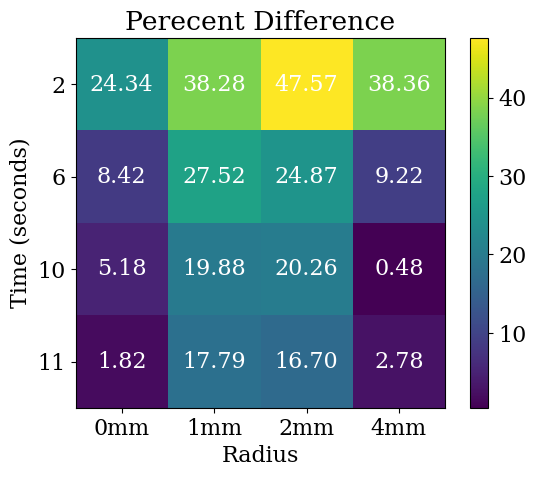

In [159]:
# data = [diffr0,diffr1,diffr2,diffr4]
# data = np.transpose(data)
data = [diffr0_p,diffr1_p,diffr2_p,diffr4_p]
data = np.transpose(np.abs(data))

# # Generate random data for the heatmap
# data = np.array([[0.1475,0.2622,0.2276,0.0213], 
#                        [0.2477,1.0136,0.8495,0.0593],
#                        [0.3288,1.4870,1.3319,0.0731],
#                        [0.3292,1.3001,1.0670,0.1240]]) #areametric
# Define row and column labels
radius_labels = ["0mm", "1mm", "2mm", "4mm"] #xaxis
time_labels = ["2","6","10","11",] #yaxis

# # Heatmap range
hmin,hmax = 0.0,5

# Create a heatmap using matplotlib's imshow function
heatmap = pyplot.imshow(data, cmap='viridis', interpolation='nearest')#,vmin=hmin,vmax=hmax)

# Set row and column labels
pyplot.xticks(np.arange(len(radius_labels)), radius_labels)
pyplot.yticks(np.arange(len(time_labels)), time_labels)

# Add values as text annotations
for i in range(len(radius_labels)):
    for j in range(len(time_labels)):
        pyplot.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white')

# Add colorbar to show the scale
pyplot.title('Perecent Difference')
pyplot.xlabel('Radius') 
pyplot.ylabel('Time (seconds)') 
pyplot.colorbar(heatmap)

# Save image
pyplot.savefig('figures/PercentDiff_HeatMap.png', dpi=300)

# Show the plot
pyplot.show()

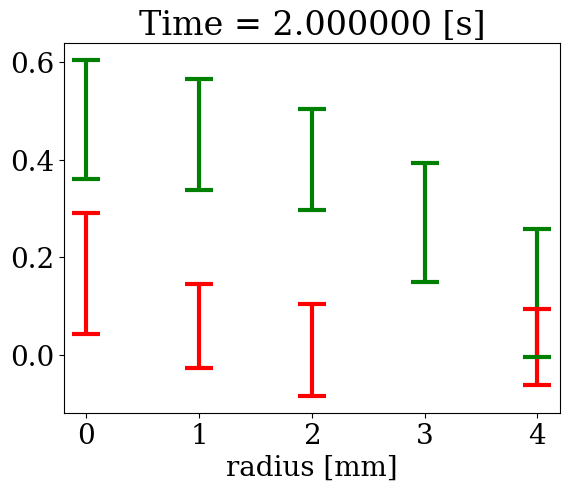

In [55]:
# t = 2[s] 
pyplot.title('Time = %f [s]' %time2)
pyplot.xlabel('radius [mm]')
pyplot.errorbar(0,samplemeanP0[timesIdSim[1]], yerr=np.max(samplestdP0), capsize=10, elinewidth=3, markeredgewidth=3,color='green',label='Simulations')
pyplot.errorbar(1,samplemeanP1[timesIdSim[1]], yerr=np.max(samplestdP1), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(2,samplemeanP2[timesIdSim[1]], yerr=np.max(samplestdP2), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(3,samplemeanP3[timesIdSim[1]], yerr=np.max(samplestdP3), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(4,samplemeanP4[timesIdSim[1]], yerr=np.max(samplestdP4), capsize=10, elinewidth=3, markeredgewidth=3,color='green')

pyplot.errorbar(0,average0[timesIdExp[1]], yerr=np.max(sDev0), capsize=10, elinewidth=3, markeredgewidth=3, color='red',label='Experiments')
pyplot.errorbar(1,average1[timesIdExp[1]], yerr=np.max(sDev1), capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(2,average2[timesIdExp[1]], yerr=np.max(sDev2), capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(4,average4[timesIdExp[1]], yerr=np.max(sDev4), capsize=10, elinewidth=3, markeredgewidth=3, color='red')

# pyplot.ylim(-0.0021,-0.0019)
pyplot.show()

In [56]:
diffr0 = (samplemeanP0[timesIdSim[1]] - average0[timesIdExp[1]])/ samplemeanP0[timesIdSim[1]]
diffr0 = (samplemean[timesIdSim[1]] - average0[timesIdExp[1]])/ samplemean[timesIdSim[1]]
diffr1 = (samplemeanP1[timesIdSim[1]] - average1[timesIdExp[1]])/ samplemeanP1[timesIdSim[1]]
diffr2 = (samplemeanP2[timesIdSim[1]] - average2[timesIdExp[1]])/ samplemeanP2[timesIdSim[1]]
diffr4 = (samplemeanP4[timesIdSim[1]] - average4[timesIdExp[1]])/ samplemeanP4[timesIdSim[1]]

print('diff0 = ', np.abs(diff0)*100)
print('diff1 = ', np.abs(diff1)*100)
print('diff2 = ', np.abs(diff2)*100)
print('diff4 = ', np.abs(diff4)*100)

diff0 =  5.180277919925446
diff1 =  19.883798841866156
diff2 =  20.26178435321331
diff4 =  0.4756566291641438


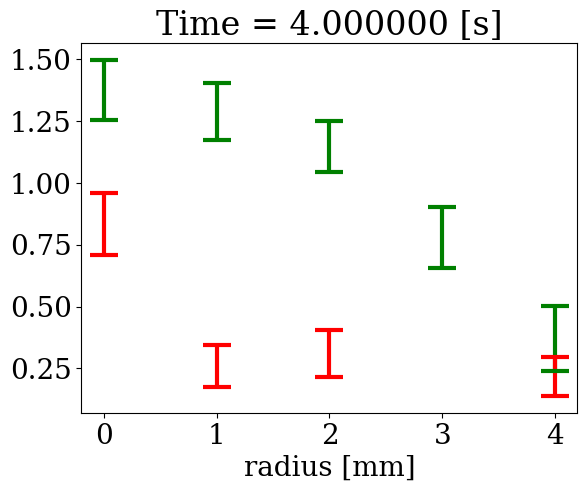

In [57]:
# t = 4[s] 
pyplot.title('Time = %f [s]' %time4)
pyplot.xlabel('radius [mm]')
pyplot.errorbar(0,samplemeanP0[timesIdSim[2]], yerr=np.max(samplestdP0), capsize=10, elinewidth=3, markeredgewidth=3,color='green',label='Simulations')
pyplot.errorbar(1,samplemeanP1[timesIdSim[2]], yerr=np.max(samplestdP1), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(2,samplemeanP2[timesIdSim[2]], yerr=np.max(samplestdP2), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(3,samplemeanP3[timesIdSim[2]], yerr=np.max(samplestdP3), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(4,samplemeanP4[timesIdSim[2]], yerr=np.max(samplestdP4), capsize=10, elinewidth=3, markeredgewidth=3,color='green')

pyplot.errorbar(0,average0[timesIdExp[2]], yerr=np.max(sDev0), capsize=10, elinewidth=3, markeredgewidth=3, color='red',label='Experiments')
pyplot.errorbar(1,average1[timesIdExp[2]], yerr=np.max(sDev1), capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(2,average2[timesIdExp[2]], yerr=np.max(sDev2), capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(4,average4[timesIdExp[2]], yerr=np.max(sDev4), capsize=10, elinewidth=3, markeredgewidth=3, color='red')

# pyplot.ylim(-0.0021,-0.0019)
pyplot.show()

In [58]:
diff0 = (samplemeanP0[timesIdSim[2]] - average0[timesIdExp[2]])/samplemeanP0[timesIdSim[2]]
diff0 = (samplemean[timesIdSim[2]] - average0[timesIdExp[2]])/samplemean[timesIdSim[2]]
diff1 = (samplemeanP1[timesIdSim[2]] - average1[timesIdExp[2]])/samplemeanP1[timesIdSim[2]]
diff2 = (samplemeanP2[timesIdSim[2]] - average2[timesIdExp[2]])/samplemeanP2[timesIdSim[2]]
diff4 = (samplemeanP4[timesIdSim[2]] - average4[timesIdExp[2]])/samplemeanP4[timesIdSim[2]]

print('diff0 = ', np.abs(diff0)*100)
print('diff1 = ', np.abs(diff1)*100)
print('diff2 = ', np.abs(diff2)*100)
print('diff4 = ', np.abs(diff4)*100)

diff0 =  34.53577669556391
diff1 =  79.81335667682261
diff2 =  72.93777509297227
diff4 =  41.34244863258943


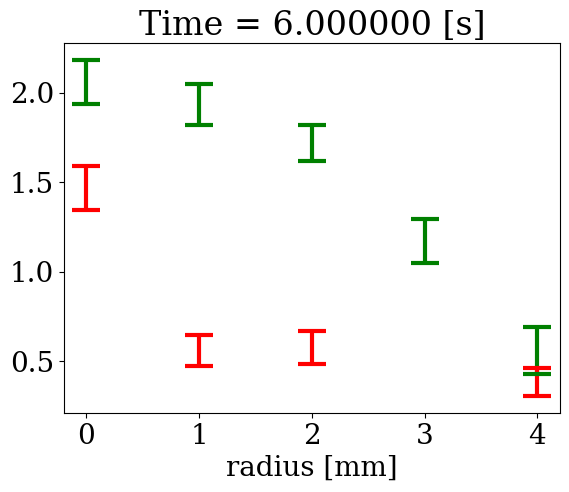

In [59]:
# t = 6[s] 
pyplot.title('Time = %f [s]' %time6)
pyplot.xlabel('radius [mm]')
pyplot.errorbar(0,samplemeanP0[timesIdSim[3]], yerr=np.max(samplestdP0), capsize=10, elinewidth=3, markeredgewidth=3,color='green',label='Simulations')
pyplot.errorbar(1,samplemeanP1[timesIdSim[3]], yerr=np.max(samplestdP1), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(2,samplemeanP2[timesIdSim[3]], yerr=np.max(samplestdP2), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(3,samplemeanP3[timesIdSim[3]], yerr=np.max(samplestdP3), capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(4,samplemeanP4[timesIdSim[3]], yerr=np.max(samplestdP4), capsize=10, elinewidth=3, markeredgewidth=3,color='green')

pyplot.errorbar(0,average0[timesIdExp[3]], yerr=np.max(sDev0), capsize=10, elinewidth=3, markeredgewidth=3, color='red',label='Experiments')
pyplot.errorbar(1,average1[timesIdExp[3]], yerr=np.max(sDev1), capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(2,average2[timesIdExp[3]], yerr=np.max(sDev2), capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(4,average4[timesIdExp[3]], yerr=np.max(sDev4), capsize=10, elinewidth=3, markeredgewidth=3, color='red')

# pyplot.ylim(-0.0021,-0.0019)
pyplot.show()

In [60]:
diff0 = (samplemeanP0[timesIdSim[3]] - average0[timesIdExp[3]])#/samplemeanP0[timesIdSim[3]]
diff1 = (samplemeanP1[timesIdSim[3]] - average1[timesIdExp[3]])#/samplemeanP1[timesIdSim[3]]
diff2 = (samplemeanP2[timesIdSim[3]] - average2[timesIdExp[3]])#/samplemeanP2[timesIdSim[3]]
diff4 = (samplemeanP4[timesIdSim[3]] - average4[timesIdExp[3]])#/samplemeanP4[timesIdSim[3]]

print('diff0 = ', np.abs(diff0)*100)
print('diff1 = ', np.abs(diff1)*100)
print('diff2 = ', np.abs(diff2)*100)
print('diff4 = ', np.abs(diff4)*100)

diff0 =  59.37436933333351
diff1 =  137.0678499999998
diff2 =  114.14279866666641
diff4 =  17.338879333333125


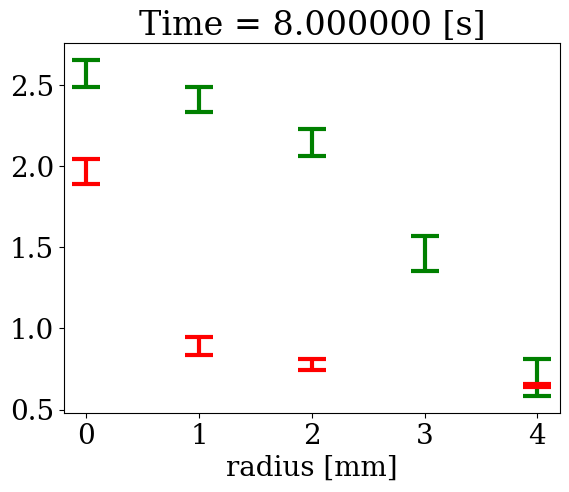

In [61]:
# t = 8[s] 
pyplot.title('Time = %f [s]' %time8)
pyplot.xlabel('radius [mm]')
pyplot.errorbar(0,samplemeanP0[timesIdSim[4]], yerr=samplestdP0[timesIdSim[4]], capsize=10, elinewidth=3, markeredgewidth=3,color='green',label='Simulations')
pyplot.errorbar(1,samplemeanP1[timesIdSim[4]], yerr=samplestdP1[timesIdSim[4]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(2,samplemeanP2[timesIdSim[4]], yerr=samplestdP2[timesIdSim[4]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(3,samplemeanP3[timesIdSim[4]], yerr=samplestdP3[timesIdSim[4]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(4,samplemeanP4[timesIdSim[4]], yerr=samplestdP4[timesIdSim[4]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')

pyplot.errorbar(0,average0[timesIdExp[4]], yerr=sDev0[timesIdExp[4]], capsize=10, elinewidth=3, markeredgewidth=3, color='red',label='Experiments')
pyplot.errorbar(1,average1[timesIdExp[4]], yerr=sDev1[timesIdExp[4]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(2,average2[timesIdExp[4]], yerr=sDev2[timesIdExp[4]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(4,average4[timesIdExp[4]], yerr=sDev4[timesIdExp[4]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')

# pyplot.ylim(-0.0021,-0.0019)
pyplot.show()

In [62]:
diff0 = (samplemeanP0[timesIdSim[4]] - average0[timesIdExp[4]])/samplemeanP0[timesIdSim[1]]
diff1 = (samplemeanP1[timesIdSim[4]] - average1[timesIdExp[4]])/samplemeanP1[timesIdSim[1]]
diff2 = (samplemeanP2[timesIdSim[4]] - average2[timesIdExp[4]])/samplemeanP2[timesIdSim[1]]
diff4 = (samplemeanP4[timesIdSim[4]] - average4[timesIdExp[4]])/samplemeanP4[timesIdSim[1]]

print('diff0 = ', np.abs(diff0)*100)
print('diff1 = ', np.abs(diff1)*100)
print('diff2 = ', np.abs(diff2)*100)
print('diff4 = ', np.abs(diff4)*100)

diff0 =  125.44594092153861
diff1 =  335.7381923338574
diff2 =  341.51336022860556
diff4 =  36.909218246594925


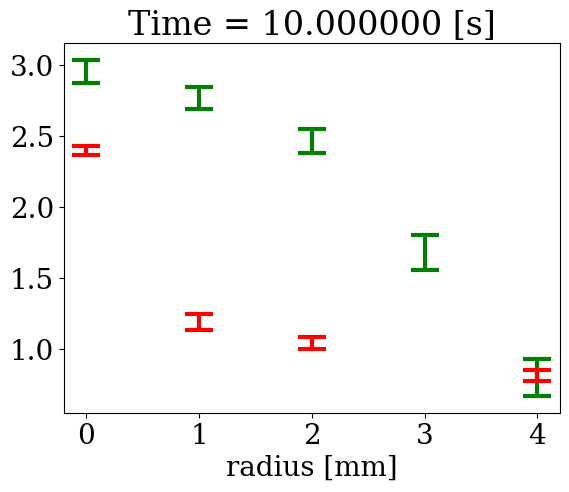

In [63]:
# t = 10[s] 
pyplot.title('Time = %f [s]' %time10)
pyplot.xlabel('radius [mm]')
pyplot.errorbar(0,samplemeanP0[timesIdSim[5]], yerr=samplestdP0[timesIdSim[5]], capsize=10, elinewidth=3, markeredgewidth=3,color='green',label='Simulations')
pyplot.errorbar(1,samplemeanP1[timesIdSim[5]], yerr=samplestdP1[timesIdSim[5]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(2,samplemeanP2[timesIdSim[5]], yerr=samplestdP2[timesIdSim[5]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(3,samplemeanP3[timesIdSim[5]], yerr=samplestdP3[timesIdSim[5]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(4,samplemeanP4[timesIdSim[5]], yerr=samplestdP4[timesIdSim[5]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')

pyplot.errorbar(0,average0[timesIdExp[5]], yerr=sDev0[timesIdExp[5]], capsize=10, elinewidth=3, markeredgewidth=3, color='red',label='Experiments')
pyplot.errorbar(1,average1[timesIdExp[5]], yerr=sDev1[timesIdExp[5]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(2,average2[timesIdExp[5]], yerr=sDev2[timesIdExp[5]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(4,average4[timesIdExp[5]], yerr=sDev4[timesIdExp[5]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')

# pyplot.ylim(-0.0021,-0.0019)
pyplot.show()

In [64]:
diff0 = (samplemeanP0[timesIdSim[5]] - average0[timesIdExp[5]])/samplemeanP0[timesIdSim[1]]
diff1 = (samplemeanP1[timesIdSim[5]] - average1[timesIdExp[5]])/samplemeanP1[timesIdSim[1]]
diff2 = (samplemeanP2[timesIdSim[5]] - average2[timesIdExp[5]])/samplemeanP2[timesIdSim[1]]
diff4 = (samplemeanP4[timesIdSim[5]] - average4[timesIdExp[5]])/samplemeanP4[timesIdSim[1]]

print('diff0 = ', np.abs(diff0)*100)
print('diff1 = ', np.abs(diff1)*100)
print('diff2 = ', np.abs(diff2)*100)
print('diff4 = ', np.abs(diff4)*100)

diff0 =  114.88526001660723
diff1 =  348.6641596148322
diff2 =  354.6482581201022
diff4 =  12.160264396214908


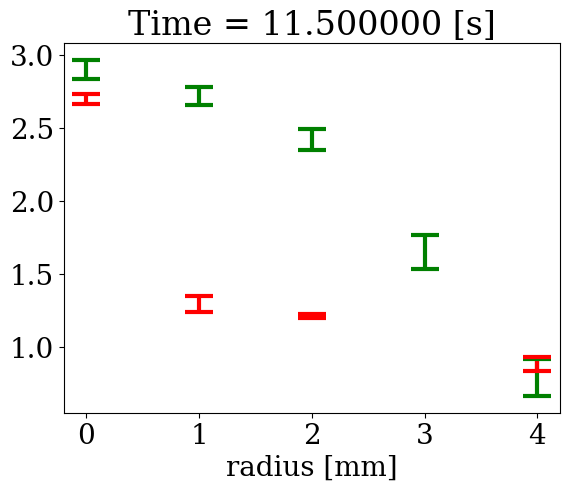

In [65]:
# t = 12[s] 
pyplot.title('Time = %f [s]' %time12)
pyplot.xlabel('radius [mm]')
pyplot.errorbar(0,samplemeanP0[timesIdSim[6]], yerr=samplestdP0[timesIdSim[6]], capsize=10, elinewidth=3, markeredgewidth=3,color='green',label='Simulations')
pyplot.errorbar(1,samplemeanP1[timesIdSim[6]], yerr=samplestdP1[timesIdSim[6]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(2,samplemeanP2[timesIdSim[6]], yerr=samplestdP2[timesIdSim[6]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(3,samplemeanP3[timesIdSim[6]], yerr=samplestdP3[timesIdSim[6]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')
pyplot.errorbar(4,samplemeanP4[timesIdSim[6]], yerr=samplestdP4[timesIdSim[6]], capsize=10, elinewidth=3, markeredgewidth=3,color='green')

pyplot.errorbar(0,average0[timesIdExp[6]], yerr=sDev0[timesIdExp[6]], capsize=10, elinewidth=3, markeredgewidth=3, color='red',label='Experiments')
pyplot.errorbar(1,average1[timesIdExp[6]], yerr=sDev1[timesIdExp[6]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(2,average2[timesIdExp[6]], yerr=sDev2[timesIdExp[6]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')
pyplot.errorbar(4,average4[timesIdExp[6]], yerr=sDev4[timesIdExp[6]], capsize=10, elinewidth=3, markeredgewidth=3, color='red')

# pyplot.ylim(-0.0021,-0.0019)
pyplot.show()

In [66]:
diff0 = (samplemeanP0[timesIdSim[6]] - average0[timesIdExp[6]])/samplemeanP0[timesIdSim[1]]
diff1 = (samplemeanP1[timesIdSim[6]] - average1[timesIdExp[6]])/samplemeanP1[timesIdSim[1]]
diff2 = (samplemeanP2[timesIdSim[6]] - average2[timesIdExp[6]])/samplemeanP2[timesIdSim[1]]
diff4 = (samplemeanP4[timesIdSim[6]] - average4[timesIdExp[6]])/samplemeanP4[timesIdSim[1]]

print('diff0 = ', np.abs(diff0)*100)
print('diff1 = ', np.abs(diff1)*100)
print('diff2 = ', np.abs(diff2)*100)
print('diff4 = ', np.abs(diff4)*100)

diff0 =  42.15274714903983
diff1 =  316.0159854978764
diff2 =  302.810529892453
diff4 =  73.5552485348356


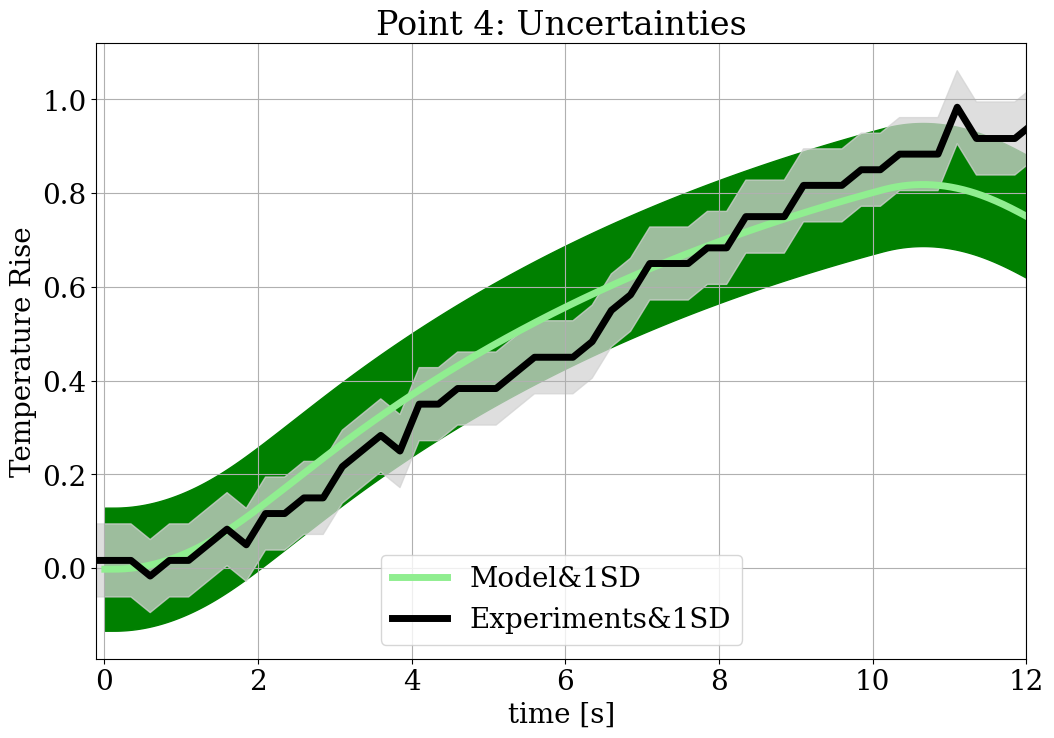

In [69]:
# Point 0 Average over all Samples & output uncertainties
pyplot.figure(figsize=(12,8))
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.title('Point 4: Uncertainties')
pyplot.plot(dataSample1['Time [s]'],samplemeanP4, label='Model&1SD', color='lightgreen',linewidth='5')
pyplot.fill_between(dataSample1['Time [s]'],samplemeanP4+1*np.max(samplestdP4),samplemeanP4-1*np.max(samplestdP4), color='green')
pyplot.plot(data_time[75:150]-19.65, average4,linestyle='-',label="Experiments&1SD",color="black",linewidth='5')
pyplot.fill_between(data_time[75:150]-19.65,plus4, minus4, color="lightgray",alpha=0.75)
pyplot.grid()
pyplot.legend(loc='lower center');
pyplot.xlim(-0.1,12);
pyplot.savefig('figures/sim_point4_outputUncert_1sd_avg.png', dpi=300)